<a href="https://colab.research.google.com/github/kaburia/ChimpUFE/blob/main/04-01-latent-variable-modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dimensionality Reduction: Latent Variable Modelling

### Neil D. Lawrence

### 2025-09-22

**Abstract**: In this lecture we turn to *unsupervised learning*.
Specifically, we introduce the idea of a latent variable model. Latent
variable models are a probabilistic perspective on unsupervised learning
which lead to dimensionality reduction algorithms.

$$
$$

<!-- Do not edit this file locally. -->
<!-- Do not edit this file locally. -->
<!---->
<!-- Do not edit this file locally. -->
<!-- Do not edit this file locally. -->
<!-- The last names to be defined. Should be defined entirely in terms of macros from above-->
<!--

-->

## ML Foundations Course Notebook Setup

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/_mlfc/includes/mlfc-notebook-setup.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/_mlfc/includes/mlfc-notebook-setup.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

We install some bespoke codes for creating and saving plots as well as
loading data sets.

In [1]:
%%capture
%pip install notutils
%pip install pods
%pip install git+https://github.com/lawrennd/mlai.git

In [2]:
import notutils
import pods
import mlai
import mlai.plot as plot

In [3]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 22})

<!--setupplotcode{import seaborn as sns
sns.set_style('darkgrid')
sns.set_context('paper')
sns.set_palette('colorblind')}-->

## Review

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/latent-variable-modelling.gpp.markdown" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/latent-variable-modelling.gpp.markdown', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

So far in our classes we have focussed on regression problems and
generalised linear models. These are examples of supervised learning. We
have considered the relationship between the likelihood and the
objective function and we have shown how we can find paramters by
maximizing the likelihood (equivalent to minimizing the objective
function) in this session we look at latent variables.

## Clustering

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/_ml/includes/clustering.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/_ml/includes/clustering.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

Clustering is a common approach to data analysis, though we will not
cover it in great depth in this course. The fundamental idea is to
associate each data point $\mathbf{ y}_{i, :}$ with one of $k$ different
discrete groups. This approach raises interesting questions - for
instance, when clustering animals into groups, we might ask whether
animal traits are truly discrete or continuous in nature. Similar
questions arise when clustering political affiliations.

Humans seem to have a natural affinity for discrete clustering
approaches. This makes clustering particularly useful when collaborating
with biologists, who often think in terms of discrete categories.
However, we should be mindful that this preference for discrete
categories may sometimes oversimplify continuous variations in data.

There is a subtle but important distinction between clustering and
vector quantisation. In true clustering, we typically expect to see
reductions in data density between natural groups - essentially, gaps in
the data that separate different clusters. This definition isn’t
universally applied though, and vector quantization may partition data
without requiring such density gaps. For our current discussion, we’ll
treat them similarly, focusing on the common challenges they share: how
to allocate points to groups and, more challengingly, how to determine
the optimal number of groups.

Clustering methods associate data points with different labels that are
allocated by the computer rather than provided by human annotators. This
process is quite intuitive for humans - we naturally cluster our
observations of the real world. For example, we cluster animals into
groups like birds, mammals, and insects. While these labels can be
provided by humans, they were originally invented through a clustering
process. With computational clustering, we want to recreate that process
of label invention.

When thinking about ideas, the Greek philosopher Plato considered the
concept of Platonic ideals - the most quintessential version of a thing,
like the most bird-like bird or chair-like chair. In clustering, we aim
to define different categories by finding their Platonic ideals (cluster
centers) and allocating each data point to its nearest center. This
allows computers to form categorizations of data at scales too large for
human processing.

# Chimpanzee Face Clustering

We know that human faces are unique to each of us but did you know that chimpanzees also have unique faces and different images of the same chimpanzee would naturally cluster together?
This is what we shall be doing with this notebook, using a sample set of 5 chimpanzees with a total of 25 images and see if we can be able to cluster the dataset
- 000000 (5 images)
- 000001 (5 images)
- 000002 (5 images)
- 000003 (5 images)
- 000004 (5 images)

## Overview

1. **Face Embedding Extraction**  
   Facial embeddings are computed from chimpanzee face images using a pre-trained deep learning model. These embeddings encode high-level facial features in a numerical vector space.

   *Iashin, Vladimir, et al. "Self-supervised Learning on Camera Trap Footage Yields a Strong Universal Face Embedder." arXiv preprint arXiv:2507.10552 (2025).*


2. **Clustering**  
   K-Means clustering is applied on the embeddings to group similar faces together. This allows us to identify unique individuals or sets of visually similar faces.

3. **Visualization**  
   Dimensionality reduction techniques (e.g., PCA, t-SNE, or UMAP) are used to project the high-dimensional embeddings into 2D space. The plots clearly show that the faces of chimpanzees cluster, supporting the hypothesis that embeddings can capture individual identity.

## Key Result

The plots in the notebook reveal some distinct clusters corresponding to different chimpanzee individuals.

1. Run all cells to reproduce the results:
   - Extract embeddings  
   - Apply clustering  
   - Visualize clusters  

2. Inspect the generated plots to confirm that chimpanzee faces group into meaningful clusters.

## Applications

- Wildlife monitoring and conservation  
- Automated identification of individual animals  
- Studying social behavior in primates  

---

### PS

One thing to note is though *0.72%* cluster together some of the faces are not we ll clustered and different loss functions could be used to reduce the similarity distances and increase the dissimilarity

<br>
This number was obtained since we have the labels on the images to validate the clusters

In [4]:
!git clone https://github.com/kaburia/ChimpUFE.git
!cd ChimpUFE && pip install -r requirements.txt

Cloning into 'ChimpUFE'...
remote: Enumerating objects: 121, done.
remote: Counting objects: 100% (121/121), done.
remote: Compressing objects: 100% (107/107), done.
remote: Total 121 (delta 25), reused 97 (delta 11), pack-reused 0 (from 0)
Receiving objects: 100% (121/121), 29.90 MiB | 26.12 MiB/s, done.
Resolving deltas: 100% (25/25), done.
Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/cu128
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 GB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 76.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 609.6/609.6 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 114.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.0/88.0 MB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 954.8/954.8 kB 48.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 726.9/726.9 MB

In [5]:
import os
os.chdir('ChimpUFE')

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd
import torch
import os

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import matplotlib.image as mpimg
from collections import Counter


import notutils as nu
import mlai

Here we'd extract the pretrained weights of the pretrained model on chimpanzee faces

In [7]:
# face recognition weights
!wget -P ./assets/weights https://github.com/v-iashin/ChimpUFE/releases/download/v1.1/25-08-29T11-49-28_340k.pth

--2025-09-19 23:21:36--  https://github.com/v-iashin/ChimpUFE/releases/download/v1.1/25-08-29T11-49-28_340k.pth
Resolving github.com (github.com)... 140.82.116.3
Connecting to github.com (github.com)|140.82.116.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://release-assets.githubusercontent.com/github-production-release-asset/1015980725/7a4e4410-e322-4638-ab16-90f3664994ca?sp=r&sv=2018-11-09&sr=b&spr=https&se=2025-09-20T00%3A03%3A08Z&rscd=attachment%3B+filename%3D25-08-29T11-49-28_340k.pth&rsct=application%2Foctet-stream&skoid=96c2d410-5711-43a1-aedd-ab1947aa7ab0&sktid=398a6654-997b-47e9-b12b-9515b896b4de&skt=2025-09-19T23%3A02%3A27Z&ske=2025-09-20T00%3A03%3A08Z&sks=b&skv=2018-11-09&sig=gKHMnfrLW710WWp7VV4zodnDIFI67v4XHmdpMhyf4e4%3D&jwt=eyJ0eXAiOiJKV1QiLCJhbGciOiJIUzI1NiJ9.eyJpc3MiOiJnaXRodWIuY29tIiwiYXVkIjoicmVsZWFzZS1hc3NldHMuZ2l0aHVidXNlcmNvbnRlbnQuY29tIiwia2V5Ijoia2V5MSIsImV4cCI6MTc1ODMyNDM5NiwibmJmIjoxNzU4MzI0MDk2LCJwYXRoIjoicmVsZWFzZWFzc2V

The cloned repository contains a gallery with the sample classess where we shall extract the embeddings for the images

In [8]:
# different individuals
!python demo_face_rec.py \
  --pretrained_weights ./assets/weights/25-08-29T11-49-28_340k.pth \
    --gallery_path ./assets/gallery \
    --embeddings embeddings.pt


/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:626: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
Saved 25 embeddings to embeddings.pt


In [9]:
# loading the extracted embeddings
data = torch.load("/content/ChimpUFE/embeddings.pt")
embeddings, paths = data["embeddings"], data["paths"]
print(embeddings.shape)


torch.Size([25, 768])


## $k$-means Clustering

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/_ml/includes/k-means-clustering.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/_ml/includes/k-means-clustering.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

To implement clustering computationally, we need to mathematically
represent both our objects and cluster centers as vectors
($\mathbf{ x}_i$ and $\boldsymbol{ \mu}_j$ respectively) and define a
notion of either similarity or distance between them. The distance
function $d_{ij} = f(\mathbf{ x}_i, \boldsymbol{ \mu}_j)$ measures how
far each object is from potential cluster centers. For example, we might
cluster customers by representing them through their purchase history
and measuring their distance to different customer archetypes.

## Squared Distance

A commonly used distance metric is the squared distance:
$d_{ij} = (\mathbf{ x}_i - \boldsymbol{ \mu}_j)^2$. This metric appears
frequently in machine learning - we saw it earlier measuring prediction
errors in regression, and here it measures dissimilarity between data
points and cluster centers.

Once we have decided on the distance or similarity function, we can
decide a number of cluster centers, $K$. We find their location by
allocating each center to a sub-set of the points and minimizing the sum
of the squared errors, $$
E(\mathbf{M}) = \sum_{i \in \mathbf{i}_j} (\mathbf{ x}_i - \boldsymbol{ \mu}_j)^2
$$ where the notation $\mathbf{i}_j$ represents all the indices of each
data point which has been allocated to the $j$th cluster represented by
the center $\boldsymbol{ \mu}_j$.

## $k$-Means Clustering

One approach to minimizing this objective function is known as
*$k$-means clustering*. It is simple and relatively quick to implement,
but it is an initialization sensitive algorithm. Initialization is the
process of choosing an initial set of parameters before optimization.
For $k$-means clustering you need to choose an initial set of centers.
In $k$-means clustering your final set of clusters is very sensitive to
the initial choice of centers. For more technical details on $k$-means
clustering you can watch a video of Alex Ihler introducing the algorithm
here.

The $k$-means algorithm provides a straightforward approach to
clustering data. It requires two key elements: a set of $k$ cluster
centres and a way to assign each data point to a cluster. The algorithm
follows a simple iterative process:

1.  First, initialize cluster centres by randomly selecting $k$ data
    points
2.  Assign each data point to its nearest cluster centre
3.  Update each cluster centre by computing the mean of all points
    assigned to it
4.  Repeat steps 2 and 3 until the cluster assignments stop changing

This process is intuitive and relatively easy to implement, though it
comes with certain limitations.

The $k$-means algorithm works by minimizing an objective function that
measures the sum of squared Euclidean distances between each point and
its assigned cluster center. This objective function can be written
mathematically as shown above, where $\boldsymbol{ \mu}_{j, :}$
represents the mean of cluster $j$.

It’s important to understand that while this algorithm will always
converge to a minimum, this minimum is not guaranteed to be either
global or unique. The optimization problem is non-convex, meaning there
can be multiple local minima. Different initializations of the cluster
centers can lead to different final solutions, which is one of the key
challenges in applying $k$-means clustering in practice.

In [10]:
# @title Searching for the optimal k value and computing the k means clustering

def cluster_kmeans(X, k=8, random_state=42):
    km = KMeans(n_clusters=k, random_state=random_state)
    labels = km.fit_predict(X)
    centers = km.cluster_centers_  # shape (k, D)
    return labels, centers

def write_plot(counter, caption):
    directory = "./ml"
    filestub = f"kmeans_clustering_{counter:0>3}"
    mlai.write_figure(filestub+".svg", directory=directory)
    f = open(os.path.join(directory,filestub) + '.md', 'w')
    f.write(caption)
    f.close()

def iterative_kmeans_widget(
    embeddings,
    paths=None,
    k_min=2,
    k_max=10,
    max_iter=10,
    fontsize=16,
    counter_start=0,
    draw_ellipse=False,
    add_images=False,
    image_zoom=0.2,
    image_ratio=1.0,
    use_true_clusters=False,
    k_clusters=None
):
    """
    Iterative K-means visualization with optional ellipses drawn for clusters
    and optional chimpanzee face images placed on the plot.

    embeddings: np.ndarray [N, D]
    paths: list of str, file paths to chimpanzee face images (must align with embeddings)
    image_ratio: fraction of images per cluster to overlay
    use_true_clusters: if True, project actual high-dim clustering into 2D;
                       if False, run toy KMeans in PCA 2D space for visualization
    k_clusters: If None find the optimal number of clusters by the max silhouette scores
    """

    # Step 1: Reduce to 2D for visualization
    pca = PCA(n_components=2)
    Y = pca.fit_transform(embeddings)
    if k_clusters is not None:
        best_k = k_clusters

    else:
      # Step 2: Select optimal k using silhouette score
      sil_scores = []
      for k in range(k_min, k_max+1):
          km = KMeans(n_clusters=k, n_init=max_iter, random_state=42).fit(embeddings)
          score = silhouette_score(embeddings, km.labels_)
          sil_scores.append((k, score))
      best_k = max(sil_scores, key=lambda x: x[1])[0]
      print(f"Optimal number of clusters (silhouette): {best_k}")

    # Fit final clustering in high-dimensional space
    final_kmeans = KMeans(n_clusters=best_k, n_init=max_iter, random_state=42).fit(embeddings)
    final_labels = final_kmeans.labels_
    final_centers = final_kmeans.cluster_centers_  # [best_k, D]

    # Project cluster centers to 2D
    projected_centers = pca.transform(final_centers)

    # Plot setup
    fig, ax = plt.subplots(figsize=(8, 8))
    counter = counter_start
    pi_vals = np.linspace(0, 2*np.pi, 200)

    if not use_true_clusters:
        centre_inds = np.random.permutation(Y.shape[0])[:best_k]
        centres = Y[centre_inds, :]

        for i in range(max_iter):
            # Assign points in 2D
            dist_mat = ((Y[:, :, None] - centres.T[None, :, :])**2).sum(1)
            ind = dist_mat.argmin(1)

            ax.cla()
            colors = ["green", "blue", "purple", "orange", "cyan", "magenta"]
            markers = ["x", "o", "+", "s", "d", "^", "v"]

            for j in range(best_k):
                cluster_points = Y[ind == j, :]

                if not add_images:
                    ax.plot(cluster_points[:, 0], cluster_points[:, 1],
                            markers[j % len(markers)], color=colors[j % len(colors)],
                            markersize=8, alpha=0.7)

                # Subsample images if requested
                if add_images and paths is not None:
                    cluster_paths = np.array(paths)[ind == j]
                    num_to_plot = max(1, int(len(cluster_paths) * image_ratio))
                    chosen_paths = np.random.choice(cluster_paths, size=num_to_plot, replace=False)
                    for (x0, y0), img_path in zip(cluster_points[:num_to_plot], chosen_paths):
                        try:
                            img = mpimg.imread(img_path)
                            imagebox = OffsetImage(img, zoom=image_zoom)
                            ab = AnnotationBbox(imagebox, (x0, y0), frameon=False)
                            ax.add_artist(ab)
                        except Exception as e:
                            print(f"Could not load image {img_path}: {e}")

                if draw_ellipse and cluster_points.shape[0] > 2:
                    cov = np.cov(cluster_points, rowvar=False)
                    vals, vecs = np.linalg.eigh(cov)
                    order = vals.argsort()[::-1]
                    vals, vecs = vals[order], vecs[:, order]
                    L = np.dot(vecs, np.diag(np.sqrt(vals)))
                    ellipse = np.dot(np.column_stack([np.cos(pi_vals), np.sin(pi_vals)]), L.T)
                    ax.plot(centres[j, 0] + ellipse[:, 0], centres[j, 1] + ellipse[:, 1],
                            linewidth=2, color="black")

            # Plot centres
            ax.plot(centres[:, 0], centres[:, 1], 'o', color="black", markersize=12, linewidth=3)
            ax.set_title(f"K-means Iteration {i+1} (PCA space)")
            ax.set_xlabel("PC1", fontsize=fontsize)
            ax.set_ylabel("PC2", fontsize=fontsize)

            write_plot(counter, f"Assign points to clusters (iteration {i+1}).")
            counter += 1

            # Update centres
            for j in range(best_k):
                if np.any(ind == j):
                    centres[j, :] = np.mean(Y[ind == j, :], axis=0)

    else:
        ax.cla()
        colors = ["green", "blue", "purple", "orange", "cyan", "magenta"]
        markers = ["x", "o", "+", "s", "d", "^", "v"]

        for j in range(best_k):
            cluster_points = Y[final_labels == j, :]

            if not add_images:
                ax.plot(cluster_points[:, 0], cluster_points[:, 1],
                        markers[j % len(markers)], color=colors[j % len(colors)],
                        markersize=8, alpha=0.7)

            if add_images and paths is not None:
                cluster_paths = np.array(paths)[final_labels == j]
                num_to_plot = max(1, int(len(cluster_paths) * image_ratio))
                chosen_paths = np.random.choice(cluster_paths, size=num_to_plot, replace=False)
                for (x0, y0), img_path in zip(cluster_points[:num_to_plot], chosen_paths):
                    try:
                        img = mpimg.imread(img_path)
                        imagebox = OffsetImage(img, zoom=image_zoom)
                        ab = AnnotationBbox(imagebox, (x0, y0), frameon=False)
                        ax.add_artist(ab)
                    except Exception as e:
                        print(f"Could not load image {img_path}: {e}")

            if draw_ellipse and cluster_points.shape[0] > 2:
                cov = np.cov(cluster_points, rowvar=False)
                vals, vecs = np.linalg.eigh(cov)
                order = vals.argsort()[::-1]
                vals, vecs = vals[order], vecs[:, order]
                L = np.dot(vecs, np.diag(np.sqrt(vals)))
                ellipse = np.dot(np.column_stack([np.cos(pi_vals), np.sin(pi_vals)]), L.T)
                ax.plot(projected_centers[j, 0] + ellipse[:, 0],
                        projected_centers[j, 1] + ellipse[:, 1],
                        linewidth=2, color="black")

        # Plot true projected centres
        ax.plot(projected_centers[:, 0], projected_centers[:, 1],
                'o', color="black", markersize=12, linewidth=3)
        ax.set_title("K-means Clustering (true clusters projected to PCA)")
        ax.set_xlabel("PC1", fontsize=fontsize)
        ax.set_ylabel("PC2", fontsize=fontsize)

        write_plot(counter, "Clusters visualized in PCA projection.")
        counter += 1

    return counter, best_k, final_labels



Arguments:
- embeddings: The extracted embeddings for the images
- Paths: the path to the images: This is required to plot the images on the same plot
- add_images: Set to True to add the images of the chimps to the plot and False to just visualise the points
- draw_ellipse: Set to True to compute the
- max_iter: The number of iterations

In [11]:
paths

['./assets/gallery/000000/01.png',
 './assets/gallery/000000/02.png',
 './assets/gallery/000000/03.png',
 './assets/gallery/000000/04.png',
 './assets/gallery/000000/05.png',
 './assets/gallery/000001/00.png',
 './assets/gallery/000001/02.png',
 './assets/gallery/000001/03.png',
 './assets/gallery/000001/04.png',
 './assets/gallery/000001/05.png',
 './assets/gallery/000002/00.png',
 './assets/gallery/000002/01.png',
 './assets/gallery/000002/02.png',
 './assets/gallery/000002/03.png',
 './assets/gallery/000002/04.png',
 './assets/gallery/000003/00.png',
 './assets/gallery/000003/01.png',
 './assets/gallery/000003/02.png',
 './assets/gallery/000003/03.png',
 './assets/gallery/000003/04.png',
 './assets/gallery/000004/00.png',
 './assets/gallery/000004/01.png',
 './assets/gallery/000004/02.png',
 './assets/gallery/000004/03.png',
 './assets/gallery/000004/04.png']

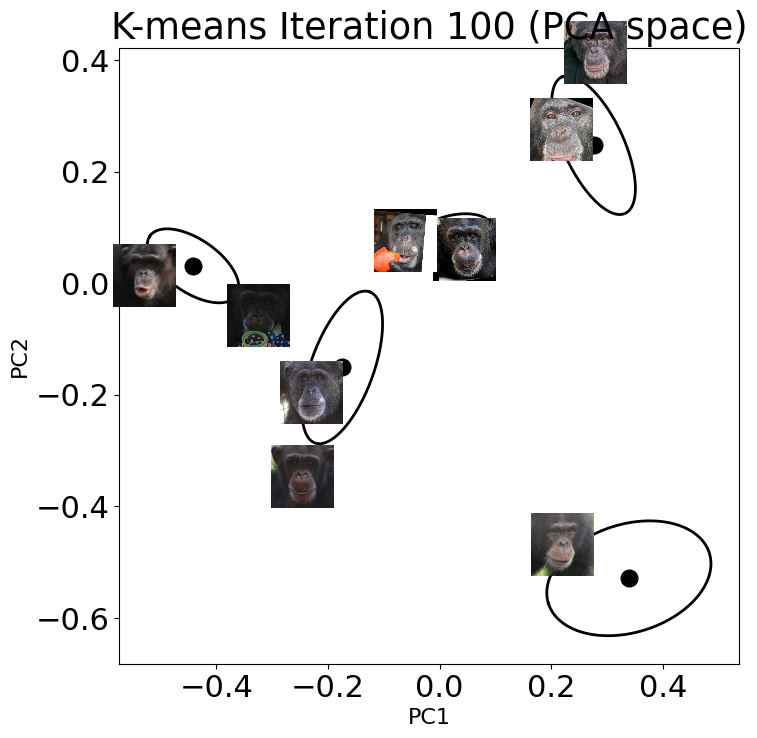

In [12]:
max_iteration = 30
counter, best_k, final_labels = iterative_kmeans_widget(embeddings,
                                                        paths=paths, add_images=True,
                                                        draw_ellipse=True,
                                                        max_iter=max_iteration,
                                                        image_zoom=0.2,
                                                        image_ratio=0.4,
                                                        k_clusters=5)

In [13]:
nu.display_plots("kmeans_clustering_{counter:0>3}.svg", directory="./ml",
                            text_top='kmeans_clustering_{counter:0>3}.tex', counter=(0, max_iteration-1))

interactive(children=(Text(value='kmeans_clustering_{counter:0>3}.tex', description='text_top'), IntSlider(val…

In [14]:
def validate_clusters_by_paths(paths, cluster_labels):
    """
    Validate clustering results against ground-truth IDs
    encoded in the parent folder names of the file paths.

    Args:
        paths: list of str, file paths (e.g. ".../000000/01.png")
        cluster_labels: np.ndarray of shape [N,], cluster assignments from KMeans

    Returns:
        bad_mask: boolean array of shape [N,], True if misclustered
        accuracy: float, overall clustering accuracy
    """
    # Extract true labels from parent folder name
    true_labels = [os.path.basename(os.path.dirname(p)) for p in paths]
    true_labels = np.array(true_labels)

    # Map each ground-truth ID to its dominant cluster
    bad_mask = np.zeros(len(paths), dtype=bool)
    gt_to_cluster = {}

    for gt in np.unique(true_labels):
        idx = np.where(true_labels == gt)[0]
        assigned_clusters = cluster_labels[idx]
        if len(assigned_clusters) == 0:
            continue
        # majority cluster for this gt class
        dominant_cluster = Counter(assigned_clusters).most_common(1)[0][0]
        gt_to_cluster[gt] = dominant_cluster

        # mark misclustered points
        bad_mask[idx] = assigned_clusters != dominant_cluster

    # Compute accuracy
    accuracy = 1.0 - bad_mask.mean()

    return bad_mask, accuracy

bad_mask, accuracy = validate_clusters_by_paths(paths, final_labels)
print(f"Accuracy: {accuracy:.3f}")


Accuracy: 0.760


In [ ]:
!git clone https://github.com/cvjena/chimpanzee_faces.git

In [ ]:
# running through the additional dataset
!python demo_face_rec.py \
  --pretrained_weights ./assets/weights/25-08-29T11-49-28_340k.pth \
    --gallery_path ./chimpanzee_faces/datasets_cropped_chimpanzee_faces/data_CTai \
    --embeddings new_dataset_embeddings.pt

In [ ]:
# load the embeddings
data_ = torch.load("/content/ChimpUFE/new_dataset_embeddings.pt")
embeddings_data, paths_data = data_["embeddings"], data_["paths"]


In [ ]:
embeddings_data.shape

In [ ]:
nu.display_plots("kmeans_clustering_{counter:0>3}.svg", directory="./ml",
                            text_top='kmeans_clustering_{counter:0>3}.tex', counter=(0, max_iteration))

## Hierarchical Clustering

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/_ml/includes/hierarchical-clustering.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/_ml/includes/hierarchical-clustering.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

Other approaches to clustering involve forming taxonomies of the cluster
centers, like humans apply to animals, to form trees. Hierarchical
clustering builds a tree structure showing the relationships between
data points. We’ll demonstrate agglomerative clustering on the oil flow
data set, which contains measurements from a multiphase flow facility.

## Oil Flow Data

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/_datasets/includes/oil-flow-data.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/_datasets/includes/oil-flow-data.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

This data set is from a physics-based simulation of oil flow in a
pipeline. The data was generated as part of a project to determine the
fraction of oil, water and gas in North Sea oil pipes
(**Bishop:gtm96?**).

In [ ]:
import pods

In [ ]:
data = pods.datasets.oil()

The data consists of 1000 12-dimensional observations of simulated oil
flow in a pipeline. Each observation is labelled according to the
multi-phase flow configuration (homogeneous, annular or laminar).

In [ ]:
# Convert data["Y"] from [1, -1, -1] in each row to rows of 0 or 1 or 2
Y = data["Y"]
# Find rows with 1 in first column (class 0)
class0 = (Y[:, 0] == 1).astype(int) * 0
# Find rows with 1 in second column (class 1)
class1 = (Y[:, 1] == 1).astype(int) * 1
# Find rows with 1 in third column (class 2)
class2 = (Y[:, 2] == 1).astype(int) * 2
# Combine into single array of class labels 0,1,2
labels = class0 + class1 + class2

The data is returned as a dictionary containing training and test inputs
(‘X,’ ‘Xtst’), training and test labels (‘Y,’ ‘Ytst’), and the names of
the features.

In [ ]:
import matplotlib.pyplot as plt
import mlai.plot as plot
import mlai
import numpy as np

In [ ]:
fig, ax = plt.subplots(figsize=plot.big_wide_figsize)
# Plot first two dimensions of the data
classes = np.unique(labels)
colors = ['r', 'g', 'b']
for i, cls in enumerate(classes):
    idx = data['Y'] == cls
    ax.plot(data['X'][idx, 0], data['X'][idx, 1], colors[i] + '.',
            markersize=10, label=f'Class {cls}')
ax.set_xlabel('1st dimension')
ax.set_ylabel('2nd dimension')
ax.legend()

mlai.write_figure('oil-flow-data.svg', directory='./datasets')

<img src="https://mlatcl.github.io/mlfc/./slides/diagrams//datasets/oil-flow-data.svg" class="" width="80%" style="vertical-align:middle;">

Figure: <i>Visualization of the first two dimensions of the oil flow
data from Bishop and James (1993)</i>

As normal we include the citation information for the data.

In [ ]:
print(data['citation'])

And extra information about the data is included, as standard, under the
keys `info` and `details`.

In [ ]:
print(data['details'])

In [ ]:
X = data['X']
Y = data['Y']

## Hierarchical Clustering of Oil Flow Data

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/_ml/includes/oil-flow-hierarchical-clustering.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/_ml/includes/oil-flow-hierarchical-clustering.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

In this example, we’ll apply hierarchical clustering to the oil flow
data set. The data contains measurements from different flow regimes in
a multiphase flow facility. The dendrogram shows how measurements
naturally cluster into different flow types. Ward’s linkage method is
used as it tends to create compact, evenly-sized clusters.

In [ ]:
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
import pods

In [ ]:
# Perform hierarchical clustering
linked = linkage(X, 'ward')  # Ward's method for minimum variance

In [ ]:
from matplotlib import pyplot as plt
from mlai import plot

In [ ]:
fig, ax = plt.subplots(figsize=plot.big_figsize)
dendrogram(linked,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True,
           leaf_rotation=45,  # Rotate labels
           leaf_font_size=8,  # Reduce font size
           ax=ax)
ax.set_xlabel('Sample Index')
ax.set_ylabel('Distance')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels
plt.tight_layout()
mlai.write_figure('hierarchical-clustering-oil.svg', directory='./dimred')

<img src="https://mlatcl.github.io/mlfc/./slides/diagrams//dimred/hierarchical-clustering-oil.svg" class="" width="60%" style="vertical-align:middle;">

Figure: <i>Hierarchical clustering applied to oil flow data. The
dendrogram shows how different flow regimes are grouped based on their
measurement similarities. The three main flow regimes (homogeneous,
annular, and laminar) should form distinct clusters.</i>

## Phylogenetic Trees

A powerful application of hierarchical clustering is in constructing
phylogenetic trees from genetic sequence data. By comparing DNA/RNA
sequences across species, we can reconstruct their evolutionary
relationships and estimate when species diverged from common ancestors.
The resulting tree structure, called a phylogeny, maps out the
evolutionary history and relationships between organisms.

Modern phylogenetic methods go beyond simple clustering - they
incorporate sophisticated models of genetic mutation and molecular
evolution. These models can estimate not just the structure of
relationships, but also the timing of evolutionary divergence events
based on mutation rates. This has important applications in tracking the
origins and spread of rapidly evolving pathogens like HIV and influenza
viruses. Understanding viral phylogenies helps epidemiologists trace
outbreak sources, track transmission patterns, and develop targeted
containment strategies.

## Product Clustering

An e-commerce company could apply hierarchical clustering to organize
their product catalog into a taxonomy tree. Products would be grouped
into increasingly specific categories - for example, Electronics might
split into Phones, Computers, etc., with Phones further dividing into
Smartphones, Feature Phones, and so on. This creates an intuitive
hierarchical organization. However, many products naturally belong in
multiple categories - for instance, running shoes could reasonably be
classified as both sporting equipment and footwear. The strict tree
structure of hierarchical clustering doesn’t allow for this kind of
multiple categorization, which is a key limitation for product
organization.

## Hierarchical Clustering Challenge

Our psychological ability to form categories is far more sophisticated
than hierarchical trees. Research in cognitive science has revealed that
humans naturally form overlapping categories and learn abstract
principles that guide classification. Josh Tenenbaum’s influential work
demonstrates how human concept learning combines multiple forms of
inference through hierarchical Bayesian models that integrate
similarity-based clustering with theory-based reasoning. This
computational approach aligns with foundational work by Eleanor Rosch on
prototype theory and Susan Carey’s research on conceptual change,
showing how categorization adapts to context and goals. While these
cognitively-inspired models better capture human-like categorization,
their computational complexity currently limits practical applications
to smaller datasets. Nevertheless, they provide important insights into
more flexible clustering approaches that could eventually enhance
machine learning systems.

## Other Clustering Approaches

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/_ml/includes/other-clustering.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/_ml/includes/other-clustering.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

Spectral clustering (Shi and Malik (2000),Ng et al. (n.d.)) is a
powerful technique that uses eigenvalues of similarity matrices to
perform dimensionality reduction before clustering. Unlike k-means, it
can identify clusters of arbitrary shape, making it effective for
complex data like image segmentation or social networks.

The Dirichlet process provides a Bayesian framework for clustering
without pre-specifying the number of clusters. It’s particularly
valuable in scenarios where new, previously unseen categories may emerge
over time. For example, in species discovery, it can model the
probability of finding new species while accounting for known ones. This
“infinite clustering” property makes it well-suited for open-ended
learning problems where the total number of categories is unknown.

## High Dimensional Data

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/_dimred/includes/high-dimensional-data.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/_dimred/includes/high-dimensional-data.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

To introduce high dimensional data, we will first of all introduce a
hand written digit from the U.S. Postal Service handwritten digit data
set (originally collected from scanning enveolopes) and used in the
first convolutional neural network paper (Le Cun et al., 1989).

Le Cun et al. (1989) downscaled the images to $16 \times 16$, here we
use an image at the original scale, containing 64 rows and 57 columns.
Since the pixels are binary, and the number of dimensions is 3,648, this
space contains $2^{3,648}$ possible images. So this space contains a lot
more than just one digit.

## USPS Samples

If we sample from this space, taking each pixel independently from a
probability which is given by the number of pixels which are ‘on’ in the
original image, over the total number of pixels, we see images that look
nothing like the original digit.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import mlai
import pods

In [ ]:
fig, ax = plt.subplots(figsize=(5,5))

pods.access.download_url("https://github.com/lawrennd/slides/raw/gh-pages/diagrams/ml/br1561_6.3.pgm",
                         store_directory="./ml")
six_image = mlai.load_pgm("br1561_6.3.pgm", directory ="./ml")
rows = six_image.shape[0]
col = six_image.shape[1]

ax.imshow(six_image,interpolation='none').set_cmap('gray')
mlai.write_figure("dem_six000.png", directory="./dimred/")
for i in range(3):
    rand_image = np.random.rand(rows, col)<((six_image>0).sum()/float(rows*col))
    ax.imshow(rand_image,interpolation='none').set_cmap('gray')
    mlai.write_figure('dem_six{i:0>3}.png'.format(i=i+1), directory="./dimred/")

In [ ]:
from ipywidgets import IntSlider
import notutils as nu

In [ ]:
nu.display_plots('dem_six{counter:0>3}.png', directory='./dimred', counter=IntSlider(0, 0, 3, 1))

<table>
<tr>
<td width="30%">

<img class="" src="https://mlatcl.github.io/mlfc/./slides/diagrams//dimred/dem_six000.png" style="width:100%">

</td>
<td width="30%">

<img class="" src="https://mlatcl.github.io/mlfc/./slides/diagrams//dimred/dem_six001.png" style="width:100%">

</td>
<td width="30%">

<img class="" src="https://mlatcl.github.io/mlfc/./slides/diagrams//dimred/dem_six002.png" style="width:100%">

</td>
</tr>
</table>

Figure: <i>Even if we sample every nano second from now until the end of
the universe we won’t see the original six again.</i>

Even if we sample every nanosecond from now until the end of the
universe you won’t see the original six again.

## Simple Model of Digit

So, an independent pixel model for this digit doesn’t seem sensible. The
total space is enormous, and yet the space occupied by the type of data
we’re interested in is relatively small.

Consider a different type of model. One where we take a prototype six
and we rotate it left and right to create new data.

In [ ]:
%pip install scikit-image

In [ ]:
from skimage.transform import rotate

In [ ]:
fig, ax = plt.subplots(figsize=plot.big_figsize)
six_image = mlai.load_pgm('br1561_6.3.pgm', directory ='./ml')
six_image = np.hstack([np.zeros((rows, 3)), six_image, np.zeros((rows, 4))])
dim_one = np.asarray(six_image.shape)
angles = range(360)
i = 0
Y = np.zeros((len(angles), np.prod(dim_one)))
for angle in angles:
    rot_image = rotate(six_image, angle)
    dim_two = np.asarray(rot_image.shape)
    start = [int(round((dim_two[0] - dim_one[0])/2)), int(round((dim_two[1] - dim_one[1])/2))]
    crop_image = rot_image[start[0]+np.array(range(dim_one[0])), :][:, start[1]+np.array(range(dim_one[1]))]
    Y[i, :] = crop_image.flatten()
    ax.imshow(rot_image,interpolation='none').set_cmap('gray')
    mlai.write_figure(f"dem_six_rotate{angle:0>3}.png", directory="./dimred/")

In [ ]:
import notutils as nu

In [ ]:
nu.display_plots('dem_six_rotate{counter:0>3}.png', directory='./dimred', counter=(0, 6))

<table>
<tr>
<td width="30%">

<img class="" src="https://mlatcl.github.io/mlfc/./slides/diagrams//dimred/dem_six_rotate001.png" style="width:100%">

</td>
<td width="30%">

<img class="" src="https://mlatcl.github.io/mlfc/./slides/diagrams//dimred/dem_six_rotate003.png" style="width:100%">

</td>
<td width="30%">

<img class="" src="https://mlatcl.github.io/mlfc/./slides/diagrams//dimred/dem_six_rotate005.png" style="width:100%">

</td>
</tr>
</table>

Figure: <i>Rotate a prototype six to form a set of plausible sixes.</i>

<table>
<tr>
<td width="30%">

<img class="" src="https://mlatcl.github.io/mlfc/./slides/diagrams//dimred/dem_manifold_print001.png" style="width:100%">

</td>
<td width="30%">

<img class="" src="https://mlatcl.github.io/mlfc/./slides/diagrams//dimred/dem_manifold_print002.png" style="width:100%">

</td>
</tr>
</table>

Figure: <i>The rotated sixes projected onto the first two principal
components of the ‘rotated data set.’ The data lives on a one
dimensional manifold in the 3,648 dimensional space.</i>

## Low Dimensional Manifolds

Of course, in practice pure rotation of the image is too simple a model.
Digits can undergo several distortions and retain their nature. For
example, they can be scaled, they can go through translation, they can
udnergo ‘thinning.’ But, for data with ‘structure’ we expect fewer of
these distortions than the dimension of the data. This means we expect
data to live on a lower dimensonal manifold. This implies that we should
deal with high dimensional data by looking for a lower dimensional
(non-linear) embedding.

## High Dimensional Data Effects

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/_dimred/includes/high-dimensional-effects.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/_dimred/includes/high-dimensional-effects.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

In high dimensional spaces, our intuitions from everyday three
dimensional space can fail dramatically. There are two major effects
that occur:

1.  All data moves to a “shell” at one standard deviation from the mean
    (known as the “curse of dimensionality”)
2.  Distances between points become constant

Let’s explore these effects with some experiments.

In [ ]:
import numpy as np
import mlai.plot as plot
import matplotlib.pyplot as plt
import mlai

In [ ]:
# Generate high-dimensional Gaussian data
d = 1000  # dimensions
n = 100   # number of points
Y = np.random.normal(size=(n, d))

fig, ax = plt.subplots(figsize=plot.big_wide_figsize)
plot.distance_distribution(Y, title=f'Distance Distribution for {d}-D Gaussian Data', ax=ax)
mlai.write_figure('high-d-distances.svg', directory='./dimred')

<img src="https://mlatcl.github.io/mlfc/./slides/diagrams//dimred/high-d-distances.svg" class="" width="80%" style="vertical-align:middle;">

Figure: <i>Distribution of pairwise distances between points in
high-dimensional Gaussian data. The red line shows the theoretical gamma
distribution.</i>

This plot shows the distribution of pairwise distances between points in
our high-dimensional Gaussian data. The red line shows the theoretical
prediction - a gamma distribution with shape parameter d/2 and scale
2/d. The close match between theory and practice demonstrates how in
high dimensions, distances between random points become highly
concentrated around a particular value.

## Structured High Dimensional Data

Now let’s look at what happens when we introduce structure into our
high-dimensional data. We’ll create data that actually lies in a
lower-dimensional space, but embedded in high dimensions.

In [ ]:
# Generate data that lies on a 2D manifold embedded in 1000D
W = np.random.normal(size=(d, 2))  # 2D latent directions
latent = np.random.normal(size=(n, 2))  # 2D latent points
Y_structured = latent @ W.T  # Project to high dimensions

fig, ax = plt.subplots(figsize=plot.big_wide_figsize)
plot.distance_distribution(Y_structured,
                         title='Distance Distribution for Structured High-D Data',
                         ax=ax)
mlai.write_figure('structured-high-d-distances.svg', directory='./dimred')

<img src="https://mlatcl.github.io/mlfc/./slides/diagrams//dimred/structured-high-d-distances.svg" class="" width="80%" style="vertical-align:middle;">

Figure: <i>Distribution of pairwise distances for structured
high-dimensional data. The distribution differs significantly from pure
high-dimensional data, reflecting the underlying 2D structure.</i>

Notice how the distance distribution for the structured data deviates
significantly from what we would expect for truly high-dimensional data.
Instead of matching the theoretical curve for 1000-dimensional data, it
more closely resembles what we would expect for 2-dimensional data. This
is because despite living in a 1000-dimensional space, the data actually
has an intrinsic dimensionality of 2.

This effect is exactly what we observe in real datasets - they typically
have much lower intrinsic dimensionality than their ambient dimension
would suggest. This is why dimensionality reduction techniques like PCA
can be so effective: they help us discover and work with this
lower-dimensional structure.

### Exercise 1

Generate your own high-dimensional dataset with known structure and
visualize its distance distribution. Try varying the intrinsic
dimensionality (e.g. use 3D or 4D latent space) and observe how the
distance distribution changes. What happens if you add some noise to the
structured data?

In [ ]:
# Write your answer to Exercise 1 here

## High Dimensional Effects in Real Data

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/_dimred/includes/high-dimensional-data-real.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/_dimred/includes/high-dimensional-data-real.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

We’ve seen how high-dimensional random data behaves in a very specific
way, with highly concentrated distance distributions. Now let’s examine
some real datasets to see how they differ.

In [ ]:
import numpy as np
import mlai.plot as plot
import matplotlib.pyplot as plt
import pods

First let’s look at a motion capture dataset, which despite having high
dimension, is constrained by the physics of human movement.

In [ ]:
data = pods.datasets.osu_run1()
Y = data['Y']

fig, ax = plt.subplots(figsize=plot.big_wide_figsize)
plot.distance_distribution(Y, title='Distance Distribution for Motion Capture Data', ax=ax)

Notice how the distance distribution is much more spread out than we
would expect for random high-dimensional data. This suggests that the
motion capture data has much lower intrinsic dimensionality than its
ambient dimension, due to the physical constraints of human movement.

## Oil Flow Data

Now let’s look at the oil flow dataset, which contains measurements from
gamma densitometry sensors.

In [ ]:
data = pods.datasets.oil()
Y = data['X']

fig, ax = plt.subplots(figsize=plot.big_wide_figsize)
plot.distance_distribution(Y, title='Distance Distribution for Oil Flow Data', ax=ax)

Again we see a deviation from what we would expect for random
high-dimensional data. The oil flow data shows clear structure in its
distance distribution, reflecting the physical constraints of fluid
dynamics that govern the system.

## Implications for Dimensionality Reduction

These examples demonstrate why dimensionality reduction can be so
effective on real datasets:

1.  Real data typically has strong constraints (physical, biological,
    economic, etc.) that restrict it to a lower-dimensional manifold
2.  This manifold structure is revealed by the distribution of pairwise
    distances
3.  Dimensionality reduction techniques like PCA can discover and
    exploit this structure

When we see a distance distribution that deviates from theoretical
predictions for random high-dimensional data, it suggests that
dimensionality reduction might be particularly effective.

## Latent Variables and Dimensionality Reduction

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/_dimred/includes/latent-variable-motivation.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/_dimred/includes/latent-variable-motivation.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

Why does dimensionality reduction work on real data? The key insight is
that while our measurements may be very high-dimensional, the underlying
phenomena we’re measuring often have much lower intrinsic
dimensionality. For example:

1.  A motion capture recording might have hundreds of coordinates, but
    these are all generated by a person’s movements that have far fewer
    degrees of freedom.

2.  Genetic data may record thousands of gene expression levels, but
    these are often controlled by a much smaller number of regulatory
    processes.

3.  Images contain millions of pixels, but the actual meaningful content
    often lies on a much lower-dimensional manifold.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import mlai.plot as plot
import mlai

In [ ]:
# Example showing how a 1D curve appears in 2D
t = np.linspace(0, 2*np.pi, 100)
x = np.column_stack([np.cos(t), np.sin(t)])

# Plot the data
fig, ax = plt.subplots(1, 2, figsize=plot.big_wide_figsize)
ax[0].plot(x[:, 0], x[:, 1], 'b.')
ax[0].set_xlabel('$x_1$')
ax[0].set_ylabel('$x_2$')

# Plot the latent variable representation
ax[1].plot(t, np.zeros_like(t), 'r.')
ax[1].set_xlabel('$z$')
ax[1].set_yticks([])

mlai.write_figure('latent-variable-example.svg', directory='./dimred')

<img src="https://mlatcl.github.io/mlfc/./slides/diagrams//dimred/latent-variable-example.svg" class="" width="80%" style="vertical-align:middle;">

Figure: <i>Data that appears 2-dimensional (left) can be described by a
single latent variable $z$ (right) that traces out the curve.</i>

This example shows how data that appears to be 2-dimensional (left) can
actually be described by a single latent variable $z$ (right) that
traces out the curve. The key premise of dimensionality reduction is
finding and working with these simpler underlying representations.

# Latent Variables

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/_dimred/includes/latent-variables.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/_dimred/includes/latent-variables.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

Latent means hidden, and hidden variables are simply *unobservable*
variables. The idea of a latent variable is crucial to the concept of
artificial intelligence, machine learning and experimental design. A
latent variable could take many forms. We might observe a man walking
along a road with a large bag of clothes and we might *infer* that the
man is walking to the laundrette. Our observations are a highly complex
data space, the response in our eyes is processed through our visual
cortex, the combination of the individual’s limb movememnts and the
direction they are walking in all conflate in our heads to cause us to
infer that (perhaps) the individual is going to the laundrette. We don’t
*know* that the man is walking to the laundrette, but we have a model of
the world that suggests that it’s a likely outcome for the very complex
data. In some ways the latent variable can be seen as a *compression* of
this very complex scene. If I were writing a book, I might write that “A
man tripped over whilst walking to the laundrette.” In the reader’s mind
an image of a man, perhaps laden with dirty clothes, may occur. All
these ideas come from our expectations of the world around us. We can
make further inference about the man, some of it perhaps plausible
others less so. The man may be going to the laundrette because his
washing machine is broken, or because he doesn’t have a large enough
flat to have a washing machine, or because he’s carrying a duvet, or
because he doesn’t like ironing. All of these may *increase* in
probability given our observation, but they are still *latent*
variables. Unless we follow the man back to his appartment, or start
making other enquirires about the man, we don’t know the true answer.

It’s clear that to do inference about any complex system we *must*
include latent variables. Latent variables are extremely powerful. In
robotics, they are used to represent the *state* of the robot. The state
of the robot may include its position (in x, y coordinates) its speed,
its direction of facing. How are *these* variables unknown to the robot?
Well the robot only posesses *sensors*, it can make observations of the
nearest object in a certain direction, and it may have a map of its
environment. If we represent the state of the robot as its position on a
map, it may be uncertain of that position. If you go walking or running
in the hills around Sheffield, you can take a very high quality ordnance
survey map with you. However, unless you are a really excellent
orienteer, when you are far from any given landmark, you will probably
be *uncertain* about your true position on the map. These states are
also latent variables.

In statistical analysis of experiments you try to control for each
aspect of the experiment, in particular by *randomization*. So if I’m
interested in the ability of a particular fertilizer to improve the
yield of a particular plant I may design an experiment where I apply the
fertilizer to some plants (the treatment group) and withold the
fertilizer from others (the control group). I then test to see whether
the yield from the treatment group is better (or worse) than the control
group. I may find that I have an excellent yield for the treatment
group. However, what if I’d (unknowlingly) planted all my treatment
plants in a sunny part of the field, and all the control plants in a
shady part of the field. That would also be a latent variable, in this
case known as a *confounder*. In statistical experimental design
*randomization* is used to attempt to eliminate the correlated effects
of these confounders: you aim to ensure that if these confounders *do*
exist their effects are not correlated with treatment and contorl. This
is known as a [randomized control
trial](http://en.wikipedia.org/wiki/Randomized_controlled_trial).

Greek philosophers worried a great deal about what was knowable and what
was unknowable. Adherents of [philosophical
Skeptisism](http://en.wikipedia.org/wiki/Skepticism) were inspired by
the idea that since your senses sometimes give you contradictory
information, they cannot be trusted, and in extreme cases they chose to
*ignore* their senses. This is an acknowledgement that very often the
true state of the world cannot be known with precision. Unfortunately,
these philosophers didn’t have a good understanding of probability, so
they were unable to encapsulate their ideas through a *degree* of
belief.

We often use language to express the compression of a complex behavior
or patterns in a simpler way, for example we talk about motives as a
useful distallation for a perhaps very complex patter of behavior. In
physics we use principles of causation and simple laws to describe the
world around us. Such motives or underlying principles are difficult to
observe directly, our conclusions about them emerge over a period of
time by observing indirect consequences of the latent variables.

Epistemic uncertainty allows us to deal with these worries by
associating our degree of belief about the state of the world with a
probaiblity distribution. This core idea underpins state space
modelling, probabilistic graphical models and the wider field of latent
variable modelling. In this session we are going to explore the idea in
a simple linear system and see how it relates to *factor analysis* and
*principal component analysis*.

# Your Personality

At the beginning of the 20th century there was a great deal of interest
amoungst psychologists in formalizing patterns of thought. The approach
they used became known as factor analysis. The principle is that we
observe a potentially high dimensional vector of characteristics about
an individual. To formalize this, social scientists designed
questionaires. We can envisage many questions that we may ask, but the
assumption is that underlying these questions there are only a few
traits that dictate the behavior. These models are known as latent trait
models and the analysis is sometimes known as factor analysis. The idea
is that there are a few characteristic traits that we are looking to
discern. These traits or factors can be extracted by assimilating the
high dimensional characteristics of the individual into a few latent
factors.

## Factor Analysis Model

This causes us to consider a model as follows, if we are given a high
dimensional vector of features (perhaps questionaire answers) associated
with an individual, $\mathbf{ y}$, we assume that these factors are
actually generated from a low dimensional vector latent traits, or
latent variables, which determine the personality. $$
\mathbf{ y}= \mathbf{f}(\mathbf{ z}) + \boldsymbol{ \epsilon},
$$ where $\mathbf{f}(\mathbf{ z})$ is a *vector valued* function that is
dependent on the latent traits and $\boldsymbol{ \epsilon}$ is some
corrupting noise. For simplicity, we assume that the function is given
by a *linear* relationship, $$
\mathbf{f}(\mathbf{ z}) = \mathbf{W}\mathbf{ z}
$$ where we have introduced a matrix $\mathbf{W}$ that is sometimes
referred to as the *factor loadings* but we also immediately see is
related to our *multivariate linear regression* models from the . That
is because our vector valued function is of the form

$$
\mathbf{f}(\mathbf{ z}) =
\begin{bmatrix} f_1(\mathbf{ z}) \\ f_2(\mathbf{ z}) \\ \vdots \\
f_p(\mathbf{ z})\end{bmatrix}
$$ where there are $p$ features associated with the individual. If we
consider any of these functions individually we have a prediction
function that looks like a regression model, $$
f_j(\mathbf{ z}) =
\mathbf{ w}_{j, :}^\top \mathbf{ z},
$$ for each element of the vector valued function, where
$\mathbf{ w}_{:, j}$ is the $j$th column of the matrix $\mathbf{W}$. In
that context each column of $\mathbf{W}$ is a vector of *regression
weights*. This is a multiple input and multiple output regression. Our
inputs (or covariates) have dimensionality greater than 1 and our
outputs (or response variables) also have dimensionality greater than
one. Just as in a standard regression, we are assuming that we don’t
observe the function directly (note that this *also* makes the function
a *type* of latent variable), but we observe some corrupted variant of
the function, where the corruption is given by $\boldsymbol{ \epsilon}$.
Just as in linear regression we can assume that this corruption is given
by Gaussian noise, where the noise for the $j$th element of
$\mathbf{ y}$ is by, $$
\epsilon_j \sim \mathscr{N}\left(0,\sigma^2_j\right).
$$ Of course, just as in a regression problem we also need to make an
assumption across the individual data points to form our full
likelihood. Our data set now consists of many observations of
$\mathbf{ y}$ for diffetent individuals. We store these observations in
a *design matrix*, $\mathbf{Y}$, where each *row* of $\mathbf{Y}$
contains the observation for one individual. To emphasize that
$\mathbf{ y}$ is a vector derived from a row of $\mathbf{Y}$ we
represent the observation of the features associated with the $i$th
individual by $\mathbf{ y}_{i, :}$, and place each individual in our
data matrix,

$$
\mathbf{Y}
= \begin{bmatrix} \mathbf{ y}_{1, :}^\top \\ \mathbf{ y}_{2, :}^\top \\ \vdots \\
\mathbf{ y}_{n, :}^\top\end{bmatrix},
$$ where we have $n$ data points. Our data matrix therefore has $n$ rows
and $p$ columns. The point to notice here is that each data obsesrvation
appears as a row vector in the design matrix (thus the transpose
operation inside the brackets). Our prediction functions are now
actually a *matrix value* function, $$
\mathbf{F} = \mathbf{Z}\mathbf{W}^\top,
$$ where for each matrix the data points are in the rows and the data
features are in the columns. This implies that if we have $q$ inputs to
the function we have $\mathbf{F}\in \Re^{n\times p}$,
$\mathbf{W}\in \Re^{p \times q}$ and $\mathbf{Z}\in \Re^{n\times q}$.

### Exercise 2

Show that, given all the definitions above, if, $$
\mathbf{F} = \mathbf{Z}\mathbf{W}^\top
$$ and the elements of the vector valued function $\mathbf{F}$ are given
by $$
f_{i, j} = f_j(\mathbf{ z}_{i, :}),
$$ where $\mathbf{ z}_{i, :}$ is the $i$th row of the latent variables,
$\mathbf{Z}$, then show that $$
f_j(\mathbf{ z}_{i, :}) = \mathbf{ w}_{j, :}^\top
\mathbf{ z}_{i, :}
$$

### Exercise 2 Answer

Write your answer to Exercise 2 here

## Latent Variables vs Linear Regression

The difference between this model and a multiple output regression is
that in the regression case we are provided with the covariates
$\mathbf{Z}$, here they are *latent variables*. These variables are
unknown. Just as we have done in the past for unknowns, we now treat
them with a probability distribution. In *factor analysis* we assume
that the latent variables have a Gaussian density which is independent
across both across the latent variables associated with the different
data points, and across those associated with different data features,
so we have, $$
x_{i,j} \sim
\mathscr{N}\left(0,1\right),
$$ and we can write the density governing the latent variable associated
with a single point as, $$
\mathbf{ z}_{i, :} \sim \mathscr{N}\left(\mathbf{0},\mathbf{I}\right).
$$ If we consider the values of the function for the $i$th data point as
$$
\mathbf{f}_{i, :} =
\mathbf{f}(\mathbf{ z}_{i, :}) = \mathbf{W}\mathbf{ z}_{i, :}
$$ then we can use the rules for multivariate Gaussian relationships to
write that $$
\mathbf{f}_{i, :} \sim \mathscr{N}\left(\mathbf{0},\mathbf{W}\mathbf{W}^\top\right)
$$ which implies that the distribution for $\mathbf{ y}_{i, :}$ is given
by $$
\mathbf{ y}_{i, :} = \sim \mathscr{N}\left(\mathbf{0},\mathbf{W}\mathbf{W}^\top + \boldsymbol{\Sigma}\right)
$$ where $\boldsymbol{\Sigma}$ the covariance of the noise variable,
$\epsilon_{i, :}$ which for factor analysis is a diagonal matrix
(because we have assumed that the noise was *independent* across the
features), $$
\boldsymbol{\Sigma} = \begin{bmatrix}\sigma^2_{1} & 0 & 0 & 0\\
0 & \sigma^2_{2} & 0 & 0\\
                                     0 & 0 & \ddots &
0\\
                                     0 & 0 & 0 & \sigma^2_p\end{bmatrix}.
$$ For completeness, we could also add in a *mean* for the data vector
$\boldsymbol{ \mu}$, $$
\mathbf{ y}_{i, :} = \mathbf{W}\mathbf{ z}_{i, :} +
\boldsymbol{ \mu}+ \boldsymbol{ \epsilon}_{i, :}
$$ which would give our marginal distribution for $\mathbf{ y}_{i, :}$ a
mean $\boldsymbol{ \mu}$. However, the maximum likelihood solution for
$\boldsymbol{ \mu}$ turns out to equal the empirical mean of the data,
$$
\boldsymbol{ \mu}= \frac{1}{n} \sum_{i=1}^n
\mathbf{ y}_{i, :},
$$ *regardless* of the form of the covariance,
$\mathbf{C}= \mathbf{W}\mathbf{W}^\top + \boldsymbol{\Sigma}$. As a
result it is very common to simply preprocess the data and ensure it is
zero mean. We will follow that convention for this session.

The prior density over latent variables is independent, and the
likelihood is independent, that means that the marginal likelihood here
is also independent over the data points. Factor analysis was developed
mainly in psychology and the social sciences for understanding
personality and intelligence. [Charles
Spearman](http://en.wikipedia.org/wiki/Charles_Spearman) was concerned
with the measurements of “the abilities of man” and is credited with the
earliest version of factor analysis.

# Principal Component Analysis

In 1933 [Harold
Hotelling](http://en.wikipedia.org/wiki/Harold_Hotelling) published on
*principal component analysis* the first mention of this approach
(Hotelling, 1933). Hotelling’s inspiration was to provide mathematical
foundation for factor analysis methods that were by then widely used
within psychology and the social sciences. His model was a factor
analysis model, but he considered the noiseless ‘limit’ of the model. In
other words he took $\sigma^2_i \rightarrow 0$ so that he had

$$
\mathbf{ y}_{i, :} \sim \lim_{\sigma^2 \rightarrow 0} \mathscr{N}\left(\mathbf{0},\mathbf{W}\mathbf{W}^\top + \sigma^2 \mathbf{I}\right).
$$ The paper had two unfortunate effects. Firstly, the resulting model
is no longer valid probablistically, because the covariance of this
Gaussian is ‘degenerate.’ Because $\mathbf{W}\mathbf{W}^\top$ has rank
of at most $q$ where $q<p$ (due to the dimensionality reduction) the
determinant of the covariance is zero, meaning the inverse doesn’t exist
so the density, $$
p(\mathbf{ y}_{i, :}|\mathbf{W}) =
\lim_{\sigma^2 \rightarrow 0} \frac{1}{(2\pi)^\frac{p}{2}
|\mathbf{W}\mathbf{W}^\top + \sigma^2 \mathbf{I}|^{\frac{1}{2}}}
\exp\left(-\frac{1}{2}\mathbf{ y}_{i, :}\left[\mathbf{W}\mathbf{W}^\top+ \sigma^2
\mathbf{I}\right]^{-1}\mathbf{ y}_{i, :}\right),
$$ is *not* valid for $q<p$ (where $\mathbf{W}\in \Re^{p\times q}$).
This mathematical consequence is a probability density which has no
‘support’ in large regions of the space for $\mathbf{ y}_{i, :}$. There
are regions for which the probability of $\mathbf{ y}_{i, :}$ is zero.
These are any regions that lie off the hyperplane defined by mapping
from $\mathbf{ z}$ to $\mathbf{ y}$ with the matrix $\mathbf{W}$. In
factor analysis the noise corruption, $\boldsymbol{ \epsilon}$, allows
for points to be found away from the hyperplane. In Hotelling’s PCA the
noise variance is zero, so there is only support for points that fall
precisely on the hyperplane. Secondly, Hotelling explicity chose to
rename factor analysis as principal component analysis, arguing that the
factors social scientist sought were different in nature to the concept
of a mathematical factor. This was unfortunate because the factor
loadings, $\mathbf{W}$ can also be seen as factors in the mathematical
sense because the model Hotelling defined is a Gaussian model with
covariance given by $\mathbf{C}= \mathbf{W}\mathbf{W}^\top$ so
$\mathbf{W}$ is a *factor* of the covariance in the mathematical sense,
as well as a factor loading.

However, the paper had one great advantage over standard approaches to
factor analysis. Despite the fact that the model was a special case that
is subsumed by the more general approach of factor analysis it is this
special case that leads to a particular algorithm, namely that the
factor loadings (or principal components as Hotelling referred to them)
are given by an *eigenvalue decomposition* of the empirical covariance
matrix.

## Computation of the Marginal Likelihood

$$
\mathbf{ y}_{i,:}=\mathbf{W}\mathbf{ z}_{i,:}+\boldsymbol{ \epsilon}_{i,:},\quad \mathbf{ z}_{i,:} \sim \mathscr{N}\left(\mathbf{0},\mathbf{I}\right), \quad \boldsymbol{ \epsilon}_{i,:} \sim \mathscr{N}\left(\mathbf{0},\sigma^{2}\mathbf{I}\right)
$$

$$
\mathbf{W}\mathbf{ z}_{i,:} \sim \mathscr{N}\left(\mathbf{0},\mathbf{W}\mathbf{W}^\top\right)
$$

$$
\mathbf{W}\mathbf{ z}_{i, :} + \boldsymbol{ \epsilon}_{i, :} \sim \mathscr{N}\left(\mathbf{0},\mathbf{W}\mathbf{W}^\top + \sigma^2 \mathbf{I}\right)
$$

**Probabilistic PCA Max. Likelihood Soln** (Tipping and Bishop (1999a))

<img class="" src="https://mlatcl.github.io/mlfc/./slides/diagrams//dimred/ppca_graph.png" style="width:40%">

Figure: <i>Graphical model representing probabilistic PCA.</i>

$$p\left(\mathbf{Y}|\mathbf{W}\right)=\prod_{i=1}^{n}\mathscr{N}\left(\mathbf{ y}_{i, :}|\mathbf{0},\mathbf{W}\mathbf{W}^{\top}+\sigma^{2}\mathbf{I}\right)$$

## Eigenvalue Decomposition

Eigenvalue problems are widespreads in physics and mathematics, they are
often written as a matrix/vector equation but we prefer to write them as
a full matrix equation. In an eigenvalue problem you are looking to find
a matrix of eigenvectors, $\mathbf{U}$ and a *diagonal* matrix of
eigenvalues, $\boldsymbol{\Lambda}$ that satisfy the *matrix* equation
$$
\mathbf{A}\mathbf{U} = \mathbf{U}\boldsymbol{\Lambda}.
$$ where $\mathbf{A}$ is your matrix of interest. This equation is not
trivially solvable through matrix inverse because matrix multiplication
is not [commutative](http://en.wikipedia.org/wiki/Commutative_property),
so premultiplying by $\mathbf{U}^{-1}$ gives $$
\mathbf{U}^{-1}\mathbf{A}\mathbf{U}
= \boldsymbol{\Lambda},
$$ where we remember that $\boldsymbol{\Lambda}$ is a *diagonal* matrix,
so the eigenvectors can be used to *diagonalise* the matrix. When
performing the eigendecomposition on a Gaussian covariances,
diagonalisation is very important because it returns the covariance to a
form where there is no correlation between points.

## Positive Definite

We are interested in the case where $\mathbf{A}$ is a covariance matrix,
which implies it is *positive definite*. A positive definite matrix is
one for which the inner product, $$
\mathbf{ w}^\top \mathbf{C}\mathbf{ w}
$$ is positive for *all* values of the vector $\mathbf{ w}$ other than
the zero vector. One way of creating a positive definite matrix is to
assume that the symmetric and positive definite matrix
$\mathbf{C}\in \Re^{p\times p}$ is factorised into,
$\mathbf{A}in \Re^{p\times p}$, a *full rank* matrix, so that $$
\mathbf{C}= \mathbf{A}^\top
\mathbf{A}.
$$ This ensures that $\mathbf{C}$ must be positive definite because $$
\mathbf{ w}^\top \mathbf{C}\mathbf{ w}=\mathbf{ w}^\top
\mathbf{A}^\top\mathbf{A}\mathbf{ w}
$$ and if we now define a new *vector* $\mathbf{b}$ as $$
\mathbf{b} = \mathbf{A}\mathbf{ w}
$$ we can now rewrite as $$
\mathbf{ w}^\top \mathbf{C}\mathbf{ w}= \mathbf{b}^\top\mathbf{b} = \sum_{i}
b_i^2
$$ which, since it is a sum of squares, is positive or zero. The
constraint that $\mathbf{A}$ must be *full rank* ensures that there is
no vector $\mathbf{ w}$, other than the zero vector, which causes the
vector $\mathbf{b}$ to be all zeros.

### Exercise 3

If $\mathbf{C}=\mathbf{A}^\top \mathbf{A}$ then express $c_{i,j}$, the
value of the element at the $i$th row and the $j$th column of
$\mathbf{C}$, in terms of the columns of $\mathbf{A}$. Use this to show
that (i) the matrix is symmetric and (ii) the matrix has positive
elements along its diagonal.

### Exercise 3 Answer

Write your answer to Exercise 3 here

## Eigenvectors of a Symmetric Matric

Symmetric matrices have *orthonormal* eigenvectors. This means that
$\mathbf{U}$ is an [orthogonal
matrix](http://en.wikipedia.org/wiki/Orthogonal_matrix),
$\mathbf{U}^\top\mathbf{U} = \mathbf{I}$. This implies that
$\mathbf{u}_{:, i} ^\top \mathbf{u}_{:, j}$ is equal to 0 if $i\neq j$
and 1 if $i=j$.

## Practical Considerations

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/_dimred/includes/practical-dimensionality-reduction.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/_dimred/includes/practical-dimensionality-reduction.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

When applying dimensionality reduction in practice, there are several
important considerations:

1.  How to choose the latent dimensionality
2.  How to validate the reduction is capturing important structure
3.  What preprocessing steps are needed

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import mlai.plot as plot

In [ ]:
def plot_data_reconstruction(X, dim_reducer, num_components):
    """Visualize reconstruction error vs number of components"""
    errors = []
    dims = range(1, num_components+1)

    for d in dims:
        dim_reducer.set_params(n_components=d)
        X_reduced = dim_reducer.fit_transform(X)
        X_reconstructed = dim_reducer.inverse_transform(X_reduced)
        error = np.mean((X - X_reconstructed) ** 2)
        errors.append(error)

    fig, ax = plt.subplots(figsize=plot.big_wide_figsize)
    ax.plot(dims, errors, 'b-')
    ax.set_xlabel('Number of Components')
    ax.set_ylabel('Reconstruction Error')
    ax.set_yscale('log')

One common approach for choosing the latent dimensionality is to look at
the reconstruction error as a function of the number of components. An
“elbow” in this curve often suggests a good tradeoff between complexity
and accuracy.

Before applying dimensionality reduction, it’s usually important to: 1.
Center the data by removing the mean 2. Scale features to have unit
variance if they’re on different scales 3. Handle missing values
appropriately

## When Dimensionality Reduction Fails

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/_dimred/includes/dimensionality-reduction-failure-modes.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/_dimred/includes/dimensionality-reduction-failure-modes.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

While dimensionality reduction is powerful, it’s important to understand
when it can fail:

1.  When the data really is high dimensional with no simpler structure
2.  When the relationship between dimensions is highly nonlinear
3.  When different parts of the data have different intrinsic
    dimensionality

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import mlai.plot as plot
import mlai

## The Swiss Roll Example

In [ ]:
# Generate data that lies on a Swiss roll manifold
def generate_swiss_roll(n_points=1000):
    t = 1.5 * np.pi * (1 + 2 * np.random.rand(n_points))
    y = 21 * np.random.rand(n_points)
    x = t * np.cos(t)
    z = t * np.sin(t)
    return np.column_stack((x, y, z)), t

X, t = generate_swiss_roll()

fig = plt.figure(figsize=plot.big_wide_figsize)
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=t, cmap='viridis')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')
plt.colorbar(scatter)

mlai.write_figure('swiss-roll.svg', directory='./dimred')

<img src="https://mlatcl.github.io/mlfc/./slides/diagrams//dimred/swiss-roll.svg" class="" width="80%" style="vertical-align:middle;">

Figure: <i>The Swiss roll dataset is a classic example of data with
nonlinear structure. The color represents the position along the roll,
showing how points that are far apart in the original space are actually
close in the intrinsic manifold.</i>

## Common Failure Modes

This example shows data lying on a Swiss roll manifold. Linear
dimensionality reduction methods like PCA will fail to capture the
structure of this data, while nonlinear methods like t-SNE or UMAP may
perform better.

Common failure modes include: 1. Using linear methods on nonlinear
manifolds 2. Assuming global structure when only local structure exists
3. Not accounting for noise in the data

## Principal Component Analysis

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/_dimred/includes/principal-component-analysis.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/_dimred/includes/principal-component-analysis.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

Principal Component Analysis (PCA) is one of the most fundamental and
widely used dimensionality reduction techniques. While commonly credited
to Pearson (1901), who was interested in finding “lines and planes of
closest fit to systems of points in space,” the method as we will review
it today was introduced and *named* by Hotelling (Hotelling (1933)). The
approach is often used as a way of looking for correlations, but
Hotelling’s motivation was a principled alternative to Spearman’s factor
analysis (Spearman, 1904).

Often PCA is introduced as a method for finding directions of maximum
variance in high-dimensional data, and this is the interpretation that
is due to Pearson (1901), but philosophically these approaches arre
different even though they turn out to be identical mathematically. In a
very real sense “many models lead to the PCA algorithm.” But these
equivalences are only true when a *linear* interpretation is sought.
Nonlinear extensions of these ideas (maximum variance directions,
eigenvalue problems, latent variable models) all lead to *different*
algorithms. However, since the linear algorithm has so many
interpretations it is a wise place to begin analysis.

The mathematical foundation of PCA relies on analyzing the sample
covariance matrix of the data. For a dataset with $n$ points, this
matrix is given by:

$$
\mathbf{S}=\frac{1}{n}\sum_{i=1}^n\left(\mathbf{ y}_{i, :}-\boldsymbol{ \mu}\right)\left(\mathbf{ y}_{i, :} - \boldsymbol{ \mu}\right)^\top
$$

The modern interpretation focuses on finding a set of orthogonal
directions (principal components) along which the data varies the most,
but Hotelling’s original formulation was derived from the idea of latent
variables. The optimization problem we solve today, which maximizes the
variance along each direction while maintaining orthogonality
constraints, arises as the solution of the original latent variable
formulation (Tipping and Bishop, 1999a).

In [ ]:
import numpy as np

In [ ]:
# Generate correlated 2D Gaussian samples
num_points = 200
mean = np.array([0, 0])
cov = np.array([[2.0, 1.8],
                [1.8, 2.0]])
X = np.random.multivariate_normal(mean, cov, num_points)

In [ ]:
import matplotlib.pyplot as plt
import mlai.plot as plot

In [ ]:
def pca_plot(ax, X):
    # Compute eigenvalues and eigenvectors of covariance matrix
    eigvals, eigvecs = np.linalg.eigh(np.cov(X.T))

    # Plot data points
    ax.scatter(X[:, 0], X[:, 1], alpha=0.5)
    ax.set_xlabel('$x_1$')
    ax.set_ylabel('$x_2$')
    ax.axis('equal')

    mlai.write_figure("pca-directions-000.svg", directory='./dimred')

    # Plot covariance ellipse
    # Get eigenvalues and eigenvectors of covariance matrix
    eigenvals, eigenvecs = np.linalg.eigh(cov)

    # Calculate angle of rotation from largest eigenvector
    angle = np.arctan2(eigenvecs[1,1], eigenvecs[0,1])

    # Calculate width and height of ellipse from eigenvalues
    width = 2 * np.sqrt(eigenvals[1])  # 2 std deviations
    height = 2 * np.sqrt(eigenvals[0])

    # Create and add ellipse patch
    ellipse = plt.matplotlib.patches.Ellipse(mean, width, height,
                                           angle=angle * 180/np.pi,
                                           facecolor='none',
                                           edgecolor='r',
                                           linestyle='--')
    ax.add_patch(ellipse)
    mlai.write_figure("pca-directions-001.svg", directory='./dimred')

    # Plot principal components
    counter = 1
    for i in [0, 1]:
        counter += 1
        ax.arrow(mean[0], mean[1],
                eigvecs[0, i]*np.sqrt(eigvals[i]),
                eigvecs[1, i]*np.sqrt(eigvals[i]),
                head_width=0.1, head_length=0.1, fc='k', ec='k')
        mlai.write_figure(f"pca-directions-{counter:03d}.svg", directory='./dimred')

In [ ]:
fig, ax = plt.subplots(figsize=plot.big_figsize())
pca_plot(ax, X)

In [ ]:
import notutils as nu

In [ ]:
nu.display_plots("pca-directions-{counter:0>3}.svg", directory="./dimred", counter=(0, 3))

<img src="https://mlatcl.github.io/mlfc/./slides/diagrams//dimred/pca-directions-003.svg" class="" width="\width" style="vertical-align:middle;">

Figure: <i>Illustration of PCA on 2D correlated Gaussian data. The
arrows show the principal components (eigenvectors scaled by square root
of eigenvalues). The ellipse represents the covariance structure.</i>

## Probabilistic PCA

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/_dimred/includes/probabilistic-pca.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/_dimred/includes/probabilistic-pca.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

This linear relationship between the observed data and the latent
variables is at the heart of Hotelling’s original formulation of PCA. It
explicitly models the idea that the observed high-dimensional data is
generated from a lower-dimensional set of latent variables, with some
added noise. This perspective aligns PCA more closely with factor
analysis and highlights its nature as a latent variable model.

Probabilistic PCA (PPCA) provides a probabilistic interpretation of PCA
by explicitly modeling the generative process that creates the observed
data. The model assumes that each high-dimensional data point
$\mathbf{ y}_{i,:}$ is generated from a lower-dimensional latent
variable $\mathbf{ z}_{i,:}$ through a linear transformation with added
Gaussian noise: $$
\mathbf{ y}_{i,:} = \mathbf{W}\mathbf{ z}_{i,:} + \boldsymbol{ \epsilon}_{i,:}
$$ where
$\boldsymbol{ \epsilon}_{i,:} \sim \mathscr{N}\left(\mathbf{0},\sigma^2\mathbf{I}\right)$
represents isotropic Gaussian noise. The model places a standard
Gaussian prior over the latent variables: $$
p(\mathbf{ z}_{i,:}) = \mathscr{N}\left(\mathbf{ z}_{i,:}|\mathbf{0},\mathbf{I}\right)
$$ Given these assumptions, the conditional probability of observing a
data point given its latent representation is: $$
p(\mathbf{ y}_{i,:}|\mathbf{ z}_{i,:},\mathbf{W}) = \mathscr{N}\left(\mathbf{ y}_{i,:}|\mathbf{W}\mathbf{ z}_{i,:},\sigma^2\mathbf{I}\right)
$$ By integrating out the latent variables, we obtain the marginal
likelihood of the data: $$
p(\mathbf{ y}_{i,:}|\mathbf{W}) = \mathscr{N}\left(\mathbf{ y}_{i,:}|\mathbf{0},\mathbf{W}\mathbf{W}^{\top}+\sigma^{2}\mathbf{I}\right)
$$ This probabilistic formulation, developed by Tipping and Bishop
(Tipping and Bishop, 1999a), provides a principled framework that not
only recovers classical PCA as a special case when $\sigma^2 \to 0$, but
also enables extensions like handling missing data and mixture models.

In [ ]:
from mlai import plot
import mlai
from matplotlib import pyplot as plt

In [ ]:
pgm = plot.ppca_graph()
filename = mlai.filename_join('ppca_graph.svg', directory='./dimred')
pgm.render().figure.savefig(filename, transparent=True)

<img src="https://mlatcl.github.io/mlfc/./slides/diagrams//dimred/ppca_graph.svg" class="" width="40%" style="vertical-align:middle;">

Figure: <i>Graphical model representing probabilistic PCA.</i>

# Probabilistic PCA

In 1997 [Tipping and
Bishop](http://research.microsoft.com/pubs/67218/bishop-ppca-jrss.pdf)
(Tipping and Bishop, 1999b) and
[Roweis](https://www.cs.nyu.edu/~roweis/papers/empca.pdf) (Roweis, n.d.)
independently revisited Hotelling’s model and considered the case where
the noise variance was finite, but *shared* across all output dimensons.
Their model can be thought of as a factor analysis where $$
\boldsymbol{\Sigma} = \sigma^2 \mathbf{I}.
$$ This leads to a marginal likelihood of the form $$
p(\mathbf{Y}|\mathbf{W}, \sigma^2)
= \prod_{i=1}^n\mathscr{N}\left(\mathbf{ y}_{i, :}|\mathbf{0},\mathbf{W}\mathbf{W}^\top + \sigma^2 \mathbf{I}\right)
$$ where the limit of $\sigma^2\rightarrow 0$ is *not* taken. This
defines a proper probabilistic model. Tippping and Bishop then went on
to prove that the *maximum likelihood* solution of this model with
respect to $\mathbf{W}$ is given by an eigenvalue problem. In the
probabilistic PCA case the eigenvalues and eigenvectors are given as
follows. $$
\mathbf{W}= \mathbf{U}\mathbf{L} \mathbf{R}^\top
$$ where $\mathbf{U}$ is the eigenvectors of the empirical covariance
matrix $$
\mathbf{S} = \sum_{i=1}^n(\mathbf{ y}_{i, :} - \boldsymbol{ \mu})(\mathbf{ y}_{i,:} - \boldsymbol{ \mu})^\top,
$$ which can be written
$\mathbf{S} = \frac{1}{n} \mathbf{Y}^\top\mathbf{Y}$ if the data is zero
mean. The matrix $\mathbf{L}$ is diagonal and is dependent on the
*eigenvalues* of $\mathbf{S}$, $\boldsymbol{\Lambda}$. If the $i$th
diagonal element of this matrix is given by $\lambda_i$ then the
corresponding element of $\mathbf{L}$ is $$
\ell_i = \sqrt{\lambda_i - \sigma^2}
$$ where $\sigma^2$ is the noise variance. Note that if $\sigma^2$ is
larger than any particular eigenvalue, then that eigenvalue (along with
its corresponding eigenvector) is *discarded* from the solution.

## PPCA as Manifold Learning

Probabilistic PCA can be viewed as a simple manifold learning algorithm.
It assumes that:

1.  The data lies near a linear manifold (subspace) of the
    high-dimensional space
2.  The deviation from this manifold is Gaussian noise
3.  The intrinsic dimensionality is specified by the number of retained
    components

This view helps explain why PPCA works well when the manifold hypothesis
holds and the manifold is approximately linear. When the manifold is
nonlinear, we need more sophisticated methods like kernel PCA or neural
network-based approaches.

## Python Implementation of Probabilistic PCA

We will now implement this algorithm in python.

In [ ]:
import numpy as np

In [ ]:
# probabilistic PCA algorithm
def ppca(Y, q):
    # remove mean
    Y_cent = Y - Y.mean(0)

    # Comute covariance
    S = np.dot(Y_cent.T, Y_cent)/Y.shape[0]
    lambd, U = np.linalg.eig(S)

    # Choose number of eigenvectors
    sigma2 = np.sum(lambd[q:])/(Y.shape[1]-q)
    l = np.sqrt(lambd[:q]-sigma2)
    W = U[:, :q]*l[None, :]
    return W, sigma2

In practice we may not wish to compute the eigenvectors of the
covariance matrix directly. This is because it requires us to estimate
the covariance, which involves a sum of squares term, before estimating
the eigenvectors. We can estimate the eigenvectors directly either
through [QR
decomposition](http://en.wikipedia.org/wiki/QR_decomposition) or
[singular value
decomposition](http://en.wikipedia.org/wiki/Singular_value_decomposition).
We saw a similar issue arise when , where we also wished to avoid
computation of $\mathbf{Z}^\top\mathbf{Z}$ (or in the case of
$\boldsymbol{\Phi}^\top\boldsymbol{\Phi}$).

## Posterior for Principal Component Analysis

Under the latent variable model justification for principal component
analysis, we are normally interested in inferring something about the
latent variables given the data. This is the distribution, $$
p(\mathbf{ z}_{i, :} | \mathbf{ y}_{i, :})
$$ for any given data point. Determining this density turns out to be
very similar to the approach for determining the Bayesian posterior of
$\mathbf{ w}$ in Bayesian linear regression, only this time we place the
prior density over $\mathbf{ z}_{i, :}$ instead of $\mathbf{ w}$. The
posterior is proportional to the joint density as follows, $$
p(\mathbf{ z}_{i, :} | \mathbf{ y}_{i, :}) \propto p(\mathbf{ y}_{i,
:}|\mathbf{W}, \mathbf{ z}_{i, :}, \sigma^2) p(\mathbf{ z}_{i, :})
$$ And as in the Bayesian linear regression case we first consider the
log posterior, $$
\log p(\mathbf{ z}_{i, :} | \mathbf{ y}_{i, :}) = \log p(\mathbf{ y}_{i, :}|\mathbf{W},
\mathbf{ z}_{i, :}, \sigma^2) + \log p(\mathbf{ z}_{i, :}) + \text{const}
$$ where the constant is not dependent on $\mathbf{ z}$. As before we
collect the quadratic terms in $\mathbf{ z}_{i, :}$ and we assemble them
into a Gaussian density over $\mathbf{ z}$. $$
\log p(\mathbf{ z}_{i, :} | \mathbf{ y}_{i, :}) =
-\frac{1}{2\sigma^2} (\mathbf{ y}_{i, :} - \mathbf{W}\mathbf{ z}_{i,
:})^\top(\mathbf{ y}_{i, :} - \mathbf{W}\mathbf{ z}_{i, :}) - \frac{1}{2}
\mathbf{ z}_{i, :}^\top \mathbf{ z}_{i, :} + \text{const}
$$

### Exercise 4

Multiply out the terms in the brackets. Then collect the quadratic term
and the linear terms together. Show that the posterior has the form $$
\mathbf{ z}_{i, :} | \mathbf{W}\sim \mathscr{N}\left(\boldsymbol{ \mu}_x,\mathbf{C}_x\right)
$$ where $$
\mathbf{C}_x = \left(\sigma^{-2}
\mathbf{W}^\top\mathbf{W}+ \mathbf{I}\right)^{-1}
$$ and $$
\boldsymbol{ \mu}_x
= \mathbf{C}_x \sigma^{-2}\mathbf{W}^\top \mathbf{ y}_{i, :}
$$ Compare this to the posterior for the Bayesian linear regression from
last week, do they have similar forms? What matches and what differs?

### Exercise 4 Answer

Write your answer to Exercise 4 here

## Python Implementation of the Posterior

Now let’s implement the system in code.

### Exercise 5

Use the values for $\mathbf{W}$ and $\sigma^2$ you have computed, along
with the data set $\mathbf{Y}$ to compute the posterior density over
$\mathbf{Z}$. Write a function of the form

``` python
mu_x, C_x = posterior(Y, W, sigma2)
```

where `mu_x` and `C_x` are the posterior mean and posterior covariance
for the given $\mathbf{Y}$.

Don’t forget to subtract the mean of the data `Y` inside your function
before computing the posterior: remember we assumed at the beginning of
our analysis that the data had been centred (i.e. the mean was removed).

In [ ]:
# Write your answer to Exercise 5 here


# Answer Code
# Write code for you answer to this exercise in this box
# Do not delete these comments, otherwise you will get zero for this answer.
# Make sure your code has run and the answer is correct *before* submitting your notebook for marking.
import numpy as np
import scipy as sp
def posterior(Y, W, sigma2):
    Y_cent = Y - Y.mean(0)
    # Compute posterior over X
    C_x =
    mu_x =
    return mu_x, C_x



## Numerically Stable and Efficient Version

Just as we saw for and computation of a matrix such as
$\mathbf{Y}^\top\mathbf{Y}$ (or its centred version) can be a bad idea
in terms of loss of numerical accuracy. Fortunately, we can find the
eigenvalues and eigenvectors of the matrix $\mathbf{Y}^\top\mathbf{Y}$
without direct computation of the matrix. This can be done with the
[*singular value
decomposition*](http://en.wikipedia.org/wiki/Singular_value_decomposition).
The singular value decompsition takes a matrix, $\mathbf{Z}$ and
represents it in the form, $$
\mathbf{Z} = \mathbf{U}\boldsymbol{\Lambda}\mathbf{V}^\top
$$ where $\mathbf{U}$ is a matrix of orthogonal vectors in the columns,
meaning $\mathbf{U}^\top\mathbf{U} = \mathbf{I}$. It has the same number
of rows and columns as $\mathbf{Z}$. The matrices $\mathbf{\Lambda}$ and
$\mathbf{V}$ are both square with dimensionality given by the number of
columns of $\mathbf{Z}$. The matrix $\mathbf{\Lambda}$ is *diagonal* and
$\mathbf{V}$ is an orthogonal matrix so
$\mathbf{V}^\top\mathbf{V} = \mathbf{V}\mathbf{V}^\top = \mathbf{I}$.
The eigenvalues of the matrix $\mathbf{Y}^\top\mathbf{Y}$ are then given
by the singular values of the matrix $\mathbf{Y}^\top$ squared and the
eigenvectors are given by $\mathbf{U}$.

## Solution for $\mathbf{W}$

Given the singular value decomposition of $\mathbf{Y}$ then we have $$
\mathbf{W}=
\mathbf{U}\mathbf{L}\mathbf{R}^\top
$$ where $\mathbf{R}$ is an arbitrary rotation matrix. This implies that
the posterior is given by $$
\mathbf{C}_x =
\left[\sigma^{-2}\mathbf{R}\mathbf{L}^2\mathbf{R}^\top + \mathbf{I}\right]^{-1}
$$ because $\mathbf{U}^\top \mathbf{U} = \mathbf{I}$. Since, by
convention, we normally take $\mathbf{R} = \mathbf{I}$ to ensure that
the principal components are orthonormal we can write $$
\mathbf{C}_x = \left[\sigma^{-2}\mathbf{L}^2 +
\mathbf{I}\right]^{-1}
$$ which implies that $\mathbf{C}_x$ is actually diagonal with elements
given by $$
c_i = \frac{\sigma^2}{\sigma^2 + \ell^2_i}
$$ and allows us to write $$
\boldsymbol{ \mu}_x = [\mathbf{L}^2 + \sigma^2
\mathbf{I}]^{-1} \mathbf{L} \mathbf{U}^\top \mathbf{ y}_{i, :}
$$ $$
\boldsymbol{ \mu}_x = \mathbf{D}\mathbf{U}^\top \mathbf{ y}_{i, :}
$$ where $\mathbf{D}$ is a diagonal matrix with diagonal elements given
by $d_{i} = \frac{\ell_i}{\sigma^2 + \ell_i^2}$.

In [ ]:
import scipy as sp
import numpy as np

In [ ]:
# probabilistic PCA algorithm using SVD
def ppca(Y, q, center=True):
    """Probabilistic PCA through singular value decomposition"""
    # remove mean
    if center:
        Y_cent = Y - Y.mean(0)
    else:
        Y_cent = Y

    # Comute singluar values, discard 'R' as we will assume orthogonal
    U, sqlambd, _ = sp.linalg.svd(Y_cent.T,full_matrices=False)
    lambd = (sqlambd**2)/Y.shape[0]
    # Compute residual and extract eigenvectors
    sigma2 = np.sum(lambd[q:])/(Y.shape[1]-q)
    ell = np.sqrt(lambd[:q]-sigma2)
    return U[:, :q], ell, sigma2

def posterior(Y, U, ell, sigma2, center=True):
    """Posterior computation for the latent variables given the eigendecomposition."""
    if center:
        Y_cent = Y - Y.mean(0)
    else:
        Y_cent = Y
    C_x = np.diag(sigma2/(sigma2+ell**2))
    d = ell/(sigma2+ell**2)
    mu_x = np.dot(Y_cent, U)*d[None, :]
    return mu_x, C_x

## Scikit-learn implementation PCA

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/_dimred/includes/oil-flow-sklearn-pca.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/_dimred/includes/oil-flow-sklearn-pca.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

We’ve implemented PCA as part of supporting the learning process, but in
practice we can use the `scikit-learn` implementation. Let’s try it on
the oil flow data.

In [ ]:
%pip install scikit-learn

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=2)
pca.fit(X)
X_pca = pca.transform(X)

In [ ]:
from matplotlib import pyplot as plt
import mlai
from mlai import plot

In [ ]:
fig, ax = plt.subplots(figsize=plot.big_figsize)
# Three labels stored in Y
labels = ["homogeneous", "annular", "stratified"]
for i in range(3):
    ax.scatter(X_pca[y==i, 0], X_pca[y==i, 1], label=f'Label {i}')
ax.set_xlabel('First principal component')
ax.set_ylabel('Second principal component')
ax.legend()

plot.write_figure("oil-flow-pca-sklearn", directory='./dimred')

Figure: <i>PCA of the oil flow data.</i>

## Examples: Motion Capture Data

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/_dimred/includes/mocap-ppca.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/_dimred/includes/mocap-ppca.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

For our first example we’ll consider some motion capture data of a man
breaking into a run. [Motion capture
data](http://en.wikipedia.org/wiki/Motion_capture) involves capturing a
3-d point cloud to represent a character, often by an underlying
skeleton. For this data set, from Ohio State University, we have 54
frame of motion capture, each frame containing 102 values, which are the
3-d locations of 34 different points from the subject’s skeleton.

In [ ]:
import pods

In [ ]:
data = pods.datasets.osu_run1()
Y = data['Y']

Once the data is loaded in we can examine the first two principal
components as follows,

In [ ]:
q = 2
U, ell, sigma2 = ppca(Y, q)
mu_x, C_x = posterior(Y, U, ell, sigma2)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.plot(mu_x[:, 0], mu_x[:, 1], 'rx-')

Here because the data is a time course, we have connected points that
are neighbouring in time. This highlights the form of the run, which
involves 3 paces. This projects in our low dimensional space to 3 loops.
We can examin how much residual variance there is in the system by
looking at `sigma2`.

In [ ]:
print(sigma2)

## Robot Navigation Example

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/_dimred/includes/robot-wireless-ppca.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/_dimred/includes/robot-wireless-ppca.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

In the next example we will load in data from a robot navigation
problem. The data consists of wireless access point strengths as
recorded by a robot performing a loop around the University of
Washington’s Computer Science department in Seattle. The robot records
all the wireless access points it can cache and stores their signal
strength.

In [ ]:
import pods

In [ ]:
data = pods.datasets.robot_wireless()
Y = data['Y']
Y.shape

There are 215 observations of 30 different access points. In this case
the model is suggesting that the access point signal strength should be
linearly dependent on the location in the map. In other words we are
expecting the access point strength for the $j$th access point at robot
position $x_{i, :}$ to be represented by
$y_{i, j} = \mathbf{ w}_{j, :}^\top \mathbf{ z}_{i, :} + \epsilon_{i,j}$.

In [ ]:
import matplotlib.pyplot as plt
import mlai

In [ ]:
q = 2
U, ell, sigma2 = ppca(Y, q)
mu_x, C_x = posterior(Y, U, ell, sigma2)

fig, ax = plt.subplots(figsize=(8,8))
ax.plot(mu_x[:, 0], mu_x[:, 1], 'rx-')
ax.set_title('Latent Variable: Robot Inferred Locations')
fig, ax = plt.subplots(figsize=(8,8))
W = U*ell[None, :]
ax.plot(W[:, 0], W[:, 1], 'bo')
ax.set_title('Access Point Inferred Locations')
mlai.write_figure("dem_robot_wireless_pca.svg", directory="dimred")

In [ ]:
U, ell, sigma2 = ppca(Y.T, q)

# Interpretations of Principal Component Analysis

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/_dimred/includes/ppca-interpretations.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/_dimred/includes/ppca-interpretations.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

## Relationship to Matrix Factorization

We can use the robot naviation example to realise that PCA (and factor
analysis) are very reminiscient of the that we used for introducing
objective functions. In that system we used slightly different notation,
$\mathbf{u}_{i, :}$ for *user* location in our metaphorical library and
$\mathbf{v}_{j, :}$ for *item* location in our metaphorical library. To
see how these systems are somewhat analagous, now let us think about the
user as the robot and the items as the wifi access points. We can plot
the relative location of both. This process is known as “SLAM”:
simultaneous *localisation* and *mapping*. A latent variable model of
the type we have developed is one way of performing SLAM. We have an
estimate of the *landmarks* in the system (in this case WIFI access
points) and we have an estimate of the robot position. These are
analagous to the estimate of the user’s position and the estimate of the
items positions in the library. In the matrix factorisation example
users are informing us what items they are ‘close’ to by expressing
their preferences, in the robot localization example the robot is
informing us what access point it is close to by measuring signal
strength.

From a personal perspective, I find this analogy quite comforting. I
think it is very arguable that one of the mechanisms through which we
(as humans) may have developed higher reasoning is through the need to
navigate around our environment, identifying landmarks and associating
them with our search for food. If such a system were to exist, the idea
that it could be readily adapted to other domains such as categorising
the nature of the different foodstuffs we were able to forage is
intriguing.

From an algorithmic perspective, we also can now realise that matrix
factorization and latent variable modelling are effectively the same
thing. The only difference is the objective function and our
probabilistic (or lack of probabilistic) treatment of the variables. But
the prediction function for both systems, $$
f_{i, j} =
\mathbf{u}_{i, :}^\top \mathbf{v}_{j, :}
$$ for matrix factorization or $$
f_{i, j} = \mathbf{ z}_{i, :}^\top \mathbf{ w}_{j, :}
$$ for probabilistic PCA and factor analysis are the same.

## Other Interpretations of PCA: Separating Model and Algorithm

Since Hotelling first introduced his perspective on factor analysis as
PCA there has been somewhat of a conflation of the idea of the model
underlying PCA (for which it was very clear that Hotelling was inspired
by Factor Analysis) and the algorithm that is used to fit that model:
the eigenvalues and eigenvectors of the covariance matrix. The
eigenvectors of an ellipsoid have been known since the middle of the
19th century as the principal axes of the elipsoid, and they arise
through the following additional ideas: seeking the orthogonal
directions of *maximum variance* in a dataset. Pearson in 1901 arrived
at the same algorithm driven by a desire to seek a *symmetric
regression* between two covariate/response variables $x$ and $y$
(**Pearson:01?**). He is, therefore, often credited with the invention
of principal component analysis, but to me this seems disengenous. His
aim was very different from Hotellings, it was just happened that the
optimal solution for his model was coincident with that of Hotelling.
The approach is also known as the [Karhunen Loeve
Transform](http://en.wikipedia.org/wiki/Karhunen%E2%80%93Lo%C3%A8ve_theorem)
in stochastic process theory and in classical multidimensional scaling
the same operation can be shown to be minimising a particular objective
function based on interpoint distances in the data and the latent space
(see the section on Classical Multidimensional Scaling in [Mardia, Kent
and
Bibby](http://store.elsevier.com/Multivariate-Analysis/Kanti-%20Mardia/isbn-9780124712522/))
(Mardia et al., 1979). One of my own contributions to machine learning
was deriving yet another model whose linear variant was solved by
finding the principal subspace of the covariance matrix (an approach I
termed dual probabilistic PCA or probabilistic principal coordinate
analysis). Finally, the approach is sometimes referred to simply as
singular value decomposition (SVD). The singular value decomposition of
a data set has the following form, $$
\mathbf{Y}= \mathbf{V} \boldsymbol{\Lambda} \mathbf{U}^\top
$$ where $\mathbf{V}\in\Re^{n\times n}$ and
$\mathbf{U}^\in \Re^{p\times p}$ are square orthogonal matrices and
$\mathbf{\Lambda}^{n \times p}$ is zero apart from its first $p$
diagonal entries. Singularvalue decomposition gives a diagonalisation of
the covariance matrix, because under the SVD we have $$
\mathbf{Y}^\top\mathbf{Y}=
\mathbf{U}\boldsymbol{\Lambda}\mathbf{V}^\top\mathbf{V} \boldsymbol{\Lambda}
\mathbf{U}^\top = \mathbf{U}\boldsymbol{\Lambda}^2 \mathbf{U}^\top
$$ where $\boldsymbol{\Lambda}^2$ is now the eigenvalues of the
covariane matrix and $\mathbf{U}$ are the eigenvectors. So performing
the SVD can simply be seen as another approach to determining the
principal components.

## Separating Model and Algorithm

I’ve given a fair amount of personal thought to this situation and my
own opinion that this confusion about method arises because of a
conflation of model and algorithm. The model of Hotelling, that which he
termed principal component analysis, was really a variant of factor
analysis, and it was unfortunate that he chose to rename it. However,
the algorithm he derived was a very convenient way of optimising a
(simplified) factor analysis, and it’s therefore become very popular.
The algorithm is also the optimal solution for many other models of the
data, even some which might seem initally to be unrelated (e.g. seeking
directions of maximum variance). It is only through the mathematics of
this linear system (which also contains some intersting symmetries) that
all these ides become related. However, as soon as we choose to
non-linearise the system (e.g. through basis functions) we find that
each of the non-linear intepretations we can derive for the different
models each leads to a very different algorithm (if such an algorithm is
possible). For example [principal
curves](http://web.stanford.edu/~hastie/Papers/Principal_Curves.pdf) of
Hastie and Stuetzle (1989) attempt to non-linearise the maximum variance
interpretation, [kernel
PCA](http://en.wikipedia.org/wiki/Kernel_principal_component_analysis)
of Schölkopf et al. (1998) uses basis functions to form the eigenvalue
problem in a nonlinear space, and my own work in this area
[non-linearises the dual probabilistic
PCA](http://jmlr.org/papers/volume6/lawrence05a/lawrence05a.pdf)
(Lawrence, 2005).

My conclusion is that when you are doing machine learning you should
always have it clear in your mind what your *model* is and what your
*algorithm* is. You can recognise your model because it normally
contains a prediction function and an objective function. The algorithm
on the other hand is the sequence of steps you implement on the computer
to solve for the parameters of this model. For efficient implementation,
we often modify our model to allow for faster algorithms, and this is a
perfectly valid pragmatist’s approach, so conflation of model and
algorithm is not always a bad thing. But for clarity of thinking and
understanding it is necessary to maintain the separation and to maintain
a handle on when and why we perform the conflation.

# PCA in Practice

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/_dimred/includes/pca-in-practice.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/_dimred/includes/pca-in-practice.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

Principal component analysis is so effective in practice that there has
almost developed a mini-industry in renaming the method itself (which is
ironic, given its origin). In particular [Latent Semantic
Indexing](http://en.wikipedia.org/wiki/Latent_semantic_indexing) in text
processing is simply PCA on a particular representation of the term
frequencies of the document. There is a particular fad to rename the
eigenvectors after the nature of the data you are examining, perhaps
initially triggered by [Turk and
Pentland’s](http://www.face-rec.org/algorithms/PCA/jcn.pdf) paper on
eigenfaces, but also with
[eigenvoices](https://wiki.inf.ed.ac.uk/twiki/pub/CSTR/ListenSemester1_2007_8/kuhn-%20junqua-eigenvoice-icslp1998.pdf)
and [eigengenes](http://www.biomedcentral.com/1752-0509/1/54). This
seems to be an instantiation of a wider, and hopefully subconcious,
tendency in academia to attempt to differentiate one idea from the same
idea in related fields in order to emphasise the novelty. The
unfortunate result is somewhat of a confusing literature for relatively
simple model. My recommendations would be as follows. If you have
multivariate data, applying some form of principal component would seem
to be a very good idea as a first step. Even if you intend to later
perform classification or regression on your data, it can give you
understanding of the structure of the underlying data and help you to
develop your intuitions about the nature of your data. Intelligent
plotting and interaction with your data is always a good think, and for
high dimensional data that means that you need some way of
visualisation, PCA is typically a good starting point.

# PPCA Marginal Likelihood

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/_dimred/includes/ppca-marginal-likelihood.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/_dimred/includes/ppca-marginal-likelihood.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

We have developed the posterior density over the latent variables given
the data and the parameters, and due to symmetries in the underlying
prediction function, it has a very similar form to its sister density,
the posterior of the weights given the data from Bayesian regression.
Two key differences are as follows. If we were to do a Bayesian multiple
output regression we would find that the marginal likelihood of the data
is independent across the features and correlated across the data, $$
p(\mathbf{Y}|\mathbf{Z})
= \prod_{j=1}^p \mathscr{N}\left(\mathbf{ y}_{:, j}|\mathbf{0},
\alpha\mathbf{Z}\mathbf{Z}^\top + \sigma^2 \mathbf{I}\right)
$$ where $\mathbf{ y}_{:, j}$ is a column of the data matrix and the
independence is across the *features*, in probabilistic PCA the marginal
likelihood has the form, $$
p(\mathbf{Y}|\mathbf{W}) = \prod_{i=1}^n\mathscr{N}\left(\mathbf{ y}_{i,
:}|\mathbf{0},\mathbf{W}\mathbf{W}^\top + \sigma^2 \mathbf{I}\right)
$$ where $\mathbf{ y}_{i, :}$ is a row of the data matrix $\mathbf{Y}$
and the independence is across the data points.

# Computation of the Log Likelihood

The quality of the model can be assessed using the log likelihood of
this Gaussian form. $$
\log p(\mathbf{Y}|\mathbf{W}) = -\frac{n}{2} \log \left|
\mathbf{W}\mathbf{W}^\top + \sigma^2 \mathbf{I}\right| -\frac{1}{2}
\sum_{i=1}^n\mathbf{ y}_{i, :}^\top \left(\mathbf{W}\mathbf{W}^\top + \sigma^2
\mathbf{I}\right)^{-1} \mathbf{ y}_{i, :} +\text{const}
$$ but this can be computed more rapidly by exploiting the low rank form
of the covariance covariance,
$\mathbf{C}= \mathbf{W}\mathbf{W}^\top + \sigma^2 \mathbf{I}$ and the
fact that $\mathbf{W}= \mathbf{U}\mathbf{L}\mathbf{R}^\top$.
Specifically, we first use the decomposition of $\mathbf{W}$ to write:
$$
-\frac{n}{2} \log \left| \mathbf{W}\mathbf{W}^\top + \sigma^2 \mathbf{I}\right|
= -\frac{n}{2} \sum_{i=1}^q \log (\ell_i^2 + \sigma^2) - \frac{n(p-q)}{2}\log
\sigma^2,
$$ where $\ell_i$ is the $i$th diagonal element of $\mathbf{L}$. Next,
we use the [Woodbury matrix
identity](http://en.wikipedia.org/wiki/Woodbury_matrix_identity) which
allows us to write the inverse as a quantity which contains another
inverse in a smaller matrix: $$
(\sigma^2 \mathbf{I}+ \mathbf{W}\mathbf{W}^\top)^{-1} =
\sigma^{-2}\mathbf{I}-\sigma^{-4}\mathbf{W}{\underbrace{(\mathbf{I}+\sigma^{-2}\mathbf{W}^\top\mathbf{W})}_{\mathbf{C}_x}}^{-1}\mathbf{W}^\top
$$ So, it turns out that the original inversion of the $p \times p$
matrix can be done by forming a quantity which contains the inversion of
a $q \times q$ matrix which, moreover, turns out to be the quantity
$\mathbf{C}_x$ of the posterior.

Now, we put everything together to obtain: $$
\log p(\mathbf{Y}|\mathbf{W}) = -\frac{n}{2} \sum_{i=1}^q
\log (\ell_i^2 + \sigma^2)
- \frac{n(p-q)}{2}\log \sigma^2 - \frac{1}{2} \text{tr}\left(\mathbf{Y}^\top \left(
\sigma^{-2}\mathbf{I}-\sigma^{-4}\mathbf{W}\mathbf{C}_x
\mathbf{W}^\top \right) \mathbf{Y}\right) + \text{const},
$$ where we used the fact that a scalar sum can be written as
$\sum_{i=1}^n\mathbf{ y}_{i,:}^\top \mathbf{K}\mathbf{ y}_{i,:} = \text{tr}\left(\mathbf{Y}^\top \mathbf{K}\mathbf{Y}\right)$,
for any matrix $\mathbf{K}$ of appropriate dimensions. We now use the
properties of the trace
$\text{tr}\left(\mathbf{A}+\mathbf{B}\right)=\text{tr}\left(\mathbf{A}\right)+\text{tr}\left(\mathbf{B}\right)$
and
$\text{tr}\left(c \mathbf{A}\right) = c \text{tr}\left(\mathbf{A}\right)$,
where $c$ is a scalar and $\mathbf{A},\mathbf{B}$ matrices of compatible
sizes. Therefore, the final log likelihood takes the form: $$
\log p(\mathbf{Y}|\mathbf{W}) = -\frac{n}{2}
\sum_{i=1}^q \log (\ell_i^2 + \sigma^2) - \frac{n(p-q)}{2}\log \sigma^2 -
\frac{\sigma^{-2}}{2} \text{tr}\left(\mathbf{Y}^\top \mathbf{Y}\right)
+\frac{\sigma^{-4}}{2} \text{tr}\left(\mathbf{B}\mathbf{C}_x\mathbf{B}^\top\right) +
\text{const}
$$ where we also defined $\mathbf{B}=\mathbf{Y}^\top\mathbf{W}$.
Finally, notice that
$\text{tr}\left(\mathbf{Y}\mathbf{Y}^\top\right)=\text{tr}\left(\mathbf{Y}^\top\mathbf{Y}\right)$
can be computed faster as the sum of all the elements of
$\mathbf{Y}\circ\mathbf{Y}$, where $\circ$ denotes the element-wise (or
[Hadamard](http://en.wikipedia.org/wiki/Hadamard_product_(matrices)))
product.

## Summary and Key Points

We’ve covered several key ideas about dimensionality reduction:

1.  High-dimensional spaces have counter-intuitive properties:
    -   The curse of dimensionality
    -   Concentration of distances
2.  Real data doesn’t behave like random high-dimensional data because:
    -   It lies near lower-dimensional manifolds
    -   It has structure imposed by physics, biology, or other
        constraints
3.  This structure makes dimensionality reduction possible:
    -   PCA finds linear manifolds
    -   More sophisticated methods can find nonlinear manifolds
4.  The probabilistic perspective helps us:
    -   Understand when methods will work
    -   Quantify uncertainty in our reduced representations
    -   Connect dimensionality reduction to other machine learning
        approaches

## Further Reading

-   Chapter 7 up to pg 249 of Rogers and Girolami (2011)

## Thanks!

For more information on these subjects and more you might want to check
the following resources.

-   company: [Trent AI](https://trent.ai)
-   book: [The Atomic
    Human](https://www.penguin.co.uk/books/455130/the-atomic-human-by-lawrence-neil-d/9780241625248)
-   twitter: [@lawrennd](https://twitter.com/lawrennd)
-   podcast: [The Talking Machines](http://thetalkingmachines.com)
-   newspaper: [Guardian Profile
    Page](http://www.theguardian.com/profile/neil-lawrence)
-   blog:
    [http://inverseprobability.com](http://inverseprobability.com/blog.html)

::: {.cell .markdown}

## References

Bishop, C.M., James, G.D., 1993. Analysis of multiphase flows using
dual-energy gamma densitometry and neural networks. Nuclear Instruments
and Methods in Physics Research A327, 580–593.
<https://doi.org/10.1016/0168-9002(93)90728-Z>

Hastie, T., Stuetzle, W., 1989. Principal curves. Journal of the
American Statistical Association 84, 502–516.

Hotelling, H., 1933. Analysis of a complex of statistical variables into
principal components. Journal of Educational Psychology 24, 417–441.

Lawrence, N.D., 2005. Probabilistic non-linear principal component
analysis with Gaussian process latent variable models. Journal of
Machine Learning Research 6, 1783–1816.

Le Cun, Y., Boser, B.E., Denker, J.S., Henderson, D., Howard, R.E.,
Hubbard, W., Jackel, L.D., 1989. Backpropagation applied to handwritten
zip code recognition. Neural Computation 1, 541–551.
<https://doi.org/10.1162/neco.1989.1.4.541>

Mardia, K.V., Kent, J.T., Bibby, J.M., 1979. Multivariate analysis.
Academic Press, London.

Ng, A.Y., Jordan, M.I., Weiss, Y., n.d. On spectral clustering: Analysis
and an algorithm.

Pearson, K., 1901. On lines and planes of closest fit to systems of
points in space. The London, Edinburgh and Dublin Philosophical Magazine
and Journal of Science, Sixth Series 2, 559–572.

Rogers, S., Girolami, M., 2011. A first course in machine learning. CRC
Press.

Roweis, S.T., n.d. EM algorithms for PCA and SPCA. pp. 626–632.

Schölkopf, B., Smola, A., Müller, K.-R., 1998. Nonlinear component
analysis as a kernel eigenvalue problem. Neural Computation 10,
1299–1319. <https://doi.org/10.1162/089976698300017467>

Shi, J., Malik, J., 2000. Normalized cuts and image segmentation. IEEE
Transactions on Pattern Analysis and Machine Intelligence 22, 888–905.

Spearman, C.E., 1904. "General intelligence," objectively determined and
measured. The American Journal of Psychology 15, 201–292.

Tipping, M.E., Bishop, C.M., 1999b. Mixtures of probabilistic principal
component analysers. Neural Computation 11, 443–482.

Tipping, M.E., Bishop, C.M., 1999a. Probabilistic principal component
analysis. Journal of the Royal Statistical Society, B 6, 611–622.
<https://doi.org/doi:10.1111/1467-9868.00196>